# EDA - London Sep2022 Airbnb dataset

The purpose of this EDA is to understand the Airbnb scenario in London in September/2022.  
Besides exploring the data, this EDA will cover the following questions:  
  
  


1.	What is the price distribution of Airbnb properties?

2.	How do prices vary depending on how many people the property accommodates?

3.	What are the most common number for minimum and maximum of nights permitted?

4.	What are the cheapest and the most expensive locations for renting a property?

5.	What are the most common amenities offered by the hosts?

6.	What is the relation between number of reviews and the overall review rating?

7.	What is the relation between a property being enabled for instant booking and number of reviews per month?

8.	Do properties with shared bathrooms receive lower overall review ratings?


Dataset was acquired from Kaggle (link below):  
https://www.kaggle.com/datasets/mrnabiz/detailed-airbnb-listing-data-london-sep-2022

This public dataset is part of Airbnb and can be accessed at the original source link:
http://insideairbnb.com/
  
  
This dataset contains information about Airbnb properties in the London region as of September 2022. As a snapshot in time, it does not provide information on price variations over months. The dataset includes details such as nightly prices, locations, host information, reviews, property types (private or shared), amenities, and more.
  
Certain columns contain low-quality data and will be excluded from the analysis to ensure the integrity and reliability of the remaining dataset.

# 1.0 Introduction

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats

from tabulate import tabulate
from collections import Counter

Importing the dataset:

In [2]:
df_data = pd.read_csv('clean_df.csv')

Here is an overview of the dataframe, displaying the columns and values for the first and last rows:

In [3]:
pd.set_option('display.max_columns', None)
display(df_data)

id                                      listing_url  \
0                   13913               https://www.airbnb.com/rooms/13913   
1                   15400               https://www.airbnb.com/rooms/15400   
2                  284532              https://www.airbnb.com/rooms/284532   
3                  106332              https://www.airbnb.com/rooms/106332   
4                   17402               https://www.airbnb.com/rooms/17402   
...                   ...                                              ...   
69346             9671724             https://www.airbnb.com/rooms/9671724   
69347            20277958            https://www.airbnb.com/rooms/20277958   
69348            20512703            https://www.airbnb.com/rooms/20512703   
69349            49698549            https://www.airbnb.com/rooms/49698549   
69350  554172169432589107  https://www.airbnb.com/rooms/554172169432589107   

                                               name  \
0               Holiday London DB Room Let-on going   
1               Bright Chelsea  Apartment. Chelsea!   
2               COSY STUDIO-FLAT WITH A GREAT  VIEW   
3                  Lovely large room, Bethnal Green   
4             Superb 3-Bed/2 Bath & Wifi: Trendy W1   
...                                             ...   
69346            Cozy room in Greenwich, river view   
69347                        River view Tate Modern   
69348  Luxury 4 bed house, 100m to river and palace   
69349                       Waterfront Hampton Stay   
69350  GuestReady Gorgeous Bright 2 Br Apartment in   

                                             description  \
0      My bright double bedroom with a large window h...   
1      Lots of windows and light.  St Luke's Gardens ...   
2      My very RECENTLY RENOVATED flat is located in ...   
3      Lovely characterful room in a house belonging ...   
4      You'll have a wonderful stay in this superb mo...   
...                                                  ...   
69346  Single room available in a new three bedroom, ...   
69347  Best location in London, overlooking Thames Ri...   
69348  Forget your worries in this spacious and seren...   
69349  This luxury waterfront home is located on a ti...   
69350  Boasting a lovely balcony & plenty of sunshine...   

                                   neighborhood_overview      host_id  \
0      Finsbury Park is a friendly melting pot commun...      54730.0   
1                                         It is Chelsea.      60302.0   
2       Shoreditch is simply the coolest area in London!    1481412.0   
3                                                    NaN     264345.0   
4      Location, location, location! You won't find b...      67564.0   
...                                                  ...          ...   
69346  The following attractions can be found in Gree...   49977905.0   
69347  Best location in London, overlooking Thames Ri...    1132775.0   
69348  Quiet, community suburb of London. River comes...    1706966.0   
69349  Hampton is located on the outskirts of London ...   34213667.0   
69350  Set in a lovely area, Liddiard House is only a...  402191311.0   

                                          host_url       host_name  \
0          https://www.airbnb.com/users/show/54730           Alina   
1          https://www.airbnb.com/users/show/60302        Philippa   
2        https://www.airbnb.com/users/show/1481412            Luca   
3         https://www.airbnb.com/users/show/264345           Susie   
4          https://www.airbnb.com/users/show/67564             Liz   
...                                            ...             ...   
69346   https://www.airbnb.com/users/show/49977905            Kurt   
69347    https://www.airbnb.com/users/show/1132775            Mark   
69348    https://www.airbnb.com/users/show/1706966  Asher & Aileen   
69349   https://www.airbnb.com/users/show/34213667            Alan   
69350  https://www.airbnb.com/users/show/402191311      G

Original dataset has 52 columns and 69,351 rows:

In [4]:
df_data.shape

(69351, 52)

Some unnecessary columns will be removed: urls, ids, duplicate data, unclear information, etc:

In [5]:
unnecessary_columns = [
    'id',
    'listing_url',
    'neighborhood_overview',
    'host_id',
    'host_url',
    'host_name',
    'host_picture_url',
    'property_type',
    'calculated_host_listings_count',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
]
df_data = df_data.drop(unnecessary_columns, axis=1)

# 2.0 Data Cleaning

## 2.1 Checking for Null Values

Checking the percentage of null values in each column:

In [6]:
df_data.isnull().mean().sort_values(ascending=False).apply('{:.2%}'.format)

host_about                     46.73%
host_response_time             38.25%
host_response_rate             38.25%
host_acceptance_rate           34.99%
review_scores_value            25.73%
review_scores_checkin          25.73%
review_scores_location         25.72%
review_scores_communication    25.68%
review_scores_accuracy         25.68%
review_scores_cleanliness      25.66%
reviews_per_month              24.20%
first_review                   24.20%
review_scores_rating           24.20%
last_review                    24.20%
host_location                  17.83%
bedrooms                        4.95%
description                     2.19%
beds                            1.74%
bathrooms_text                  0.20%
host_is_superhost               0.04%
name                            0.03%
host_listings_count             0.02%
host_total_listings_count       0.02%
host_identity_verified          0.02%
latitude                        0.01%
instant_bookable                0.01%
host_verific

### 2.1.1 Removing columns missing more than 10% of values

Columns with more than 10% of null values will be removed, with the exception of columns related to review and host response/acceptance information.
  
The rationale for retaining these columns is that new properties and hosts may not initially have historical data available.

In [7]:
# Separating review columns that are allowed to have null values.
cols_to_keep = [
    'review_scores_value',
    'review_scores_checkin',
    'review_scores_location',
    'review_scores_communication',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_rating',
    'first_review',
    'last_review',
    'reviews_per_month',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
]

In [8]:
# Dropping any other columns with more than 10% missing values.
df_data = df_data.drop(
    [column
    for column, nulls_percent
      in (df_data.drop(cols_to_keep, axis=1).isnull().mean().items())
      if nulls_percent > 0.1
    ], axis=1)
df_data.shape

(69351, 36)

### 2.1.2 Removing rows with NULL values

Null values in columns related to new properties and new hosts will be imputed using the median (or another measure of central tendency) of the training dataset for subsequent machine learning applications.

Rows containing null values in columns not related to new properties and hosts will be considered to have poor-quality information and will therefore be removed from the dataset.

In [9]:
print('Checking how prices are stored:')
print(df_data['price'][0])

Checking how prices are stored:
$50.00


In [10]:
print('Showing lowest price:')
# Converting to float to show lowest price.
print(df_data['price']
      .str.replace('$', '', regex=False)
      .str.replace(',', '', regex=False)
      .astype(float, copy=False)
      .min())

Showing lowest price:
0.0


Prices informed as zero will be considered Null values:

In [11]:
df_data['price'] = df_data['price'].replace('$0.00', np.nan)

Removing rows containing null values: 

In [12]:
print('Rows containing missing values: ',
      df_data.drop(cols_to_keep, axis=1).isnull().any(axis=1).sum(), '\n')
print(df_data.drop(cols_to_keep, axis=1)
      .isnull().sum().sort_values(ascending=False))

Rows containing missing values:  5852 

bedrooms                     3435
description                  1519
beds                         1207
bathrooms_text                138
host_is_superhost              26
price                          26
name                           21
host_listings_count            12
host_total_listings_count      12
host_identity_verified         12
number_of_reviews_ltm           7
number_of_reviews               7
maximum_nights                  7
minimum_nights                  7
amenities                       7
room_type                       7
accommodates                    7
longitude                       7
latitude                        7
neighbourhood_cleansed          7
host_verifications              7
instant_bookable                7
host_since                      5
dtype: int64


These 5.852 values will be dropped, remaining 69.351 - 5.852 = 63.499 values.

In [13]:
# Saving file with values dropped for possible later inspection.
df_temp = df_data[df_data.drop(cols_to_keep, axis=1).isnull().any(axis=1)]
df_temp.to_csv('out_rows_containing_null_values_removed.csv', sep=';')

# Dropping rows containing null values.
df_data = df_data.dropna(subset=list(set(df_data.columns)-set(cols_to_keep)))
print('Dropped rows: ', df_temp.shape)
print('Current df shape:', df_data.shape)

Dropped rows:  (5852, 36)
Current df shape: (63499, 36)


In [14]:
# Checking if only columns related to new properties and
# new hosts have null values.
print('Check:', set(df_data.isnull().sum().sort_values(ascending=False)
                    .loc[lambda x: x > 0].index.to_list()
                   ) == set(cols_to_keep))

Check: True


## 2.2 Checking columns and processing column types

In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63499 entries, 0 to 69350
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         63499 non-null  object 
 1   description                  63499 non-null  object 
 2   host_since                   63499 non-null  object 
 3   host_response_time           39283 non-null  object 
 4   host_response_rate           39283 non-null  object 
 5   host_acceptance_rate         41372 non-null  object 
 6   host_is_superhost            63499 non-null  object 
 7   host_listings_count          63499 non-null  float64
 8   host_total_listings_count    63499 non-null  float64
 9   host_verifications           63499 non-null  object 
 10  host_identity_verified       63499 non-null  object 
 11  neighbourhood_cleansed       63499 non-null  object 
 12  latitude                     63499 non-null  float64
 13  longitude       

### 2.2.1 Formatting DATE columns as datetime

Aparently all dates are in format aaaa-mm-dd but data type is object.

In [16]:
column_list = [
    'host_since',
    'first_review',
    'last_review',
]

In [17]:
df_data[column_list].head(10)

host_since first_review last_review
0   2009-11-16   2010-08-18  2022-07-15
1   2009-12-05   2009-12-21  2020-03-16
4   2010-01-04   2011-03-21  2022-09-06
5   2010-10-11   2011-05-29  2022-09-02
6   2011-05-03   2011-07-04  2022-09-02
7   2011-12-07   2012-07-16  2022-07-04
8   2009-09-28   2010-11-15  2022-07-19
9   2011-12-10   2012-10-12  2022-08-22
10  2011-05-14   2013-07-06  2022-09-08
11  2010-04-05   2010-04-14  2020-03-15

Using REGEX to confirm all rows have dates in format aaaa-mm-dd:

In [18]:
def date_format_checker(column, out_of_format):
    """Checks if all dates in 'column' are in format aaaa-mm-dd.  

    In inputed dictionary 'out_of_format', key 'column' is restarted and
    then receives a list of any out of format instances.
    """
    out_of_format[column.name] = []
    for xl_date in column:
        if isinstance(xl_date, float):
            if not np.isnan(xl_date):
                out_of_format[column.name].append(xl_date)
        elif re.match(('(19[89][0-9]|20[0-1][0-9]|202[0-2])'
                       '[/.-]'
                       '(0[1-9]|1[0-2])'
                       '[/.-]'
                       '(0[1-9]|[12][0-9]|3[01])'
                       '$')
                      , xl_date) is None:
            out_of_format[column.name].append(xl_date)

In [19]:
out_of_format = {}
for column_name in column_list:
    date_format_checker(df_data[column_name], out_of_format)

print('List of dates out of format aaaa-mm-dd in each column:')
out_of_format

List of dates out of format aaaa-mm-dd in each column:


{'host_since': [], 'first_review': [], 'last_review': []}

<!-- TO DO: REGEX PARA CONFERIR -->

Date format has been checked. Data type will be transformed from object to datetime.  

In [20]:
for column_name in column_list:
    df_data[column_name] = pd.to_datetime(df_data[column_name],
                                          format= '%Y-%m-%d')

Showing range of dates of each column:

In [21]:
for column_name in column_list:
    print(column_name)
    print('min:', df_data[column_name].min())
    print('max:', df_data[column_name].max())
    print('\n')

host_since
min: 2008-12-03 00:00:00
max: 2022-09-09 00:00:00


first_review
min: 2009-12-21 00:00:00
max: 2022-09-11 00:00:00


last_review
min: 2011-07-02 00:00:00
max: 2022-09-11 00:00:00




### 2.2.2 Transforming True/False Columns into values 1 and 0

In [22]:
column_list = [
    'host_is_superhost',
    'instant_bookable',
    'host_identity_verified',
]

In [23]:
df_data[column_list].value_counts()

host_is_superhost  instant_bookable  host_identity_verified
f                  f                 t                         28794
                   t                 t                         17316
                   f                 f                          6029
t                  f                 t                          4893
f                  t                 f                          3770
t                  t                 t                          2383
                   f                 f                           192
                   t                 f                           122
dtype: int64

In [24]:
for column in column_list:
    df_data[column] = df_data[column].apply(lambda x: (1 if x == 't'
                                                       else (0 if x == 'f'
                                                             else 'error!')))

In [25]:
df_data[column_list].value_counts()

host_is_superhost  instant_bookable  host_identity_verified
0                  0                 1                         28794
                   1                 1                         17316
                   0                 0                          6029
1                  0                 1                          4893
0                  1                 0                          3770
1                  1                 1                          2383
                   0                 0                           192
                   1                 0                           122
dtype: int64

Checking column types:

In [26]:
for column in column_list:
    print(column, '-->', df_data[column].dtype)

host_is_superhost --> int64
instant_bookable --> int64
host_identity_verified --> int64


Showing percentage of True values in these columns:

In [27]:
for column in column_list:
    print(column, '--> ', '{:.1%}'.format(df_data[column].mean()),
          'of True values')

host_is_superhost -->  12.0% of True values
instant_bookable -->  37.2% of True values
host_identity_verified -->  84.1% of True values


### 2.2.3 Treating Price column

Price column is currently formatted as object type. It will be transformed into float datatype.

In [28]:
df_data['price'].value_counts()

$100.00      1758
$50.00       1521
$150.00      1482
$40.00       1418
$60.00       1368
             ... 
$1,253.00       1
$2,733.00       1
$5,139.00       1
$2,889.00       1
$1,436.00       1
Name: price, Length: 1392, dtype: int64

In [29]:
df_data['price'] = (df_data['price'].str.replace('$', '', regex=False)
                    .str.replace(',', '', regex=False)
                    .astype(float, copy=False))
df_data['price'].value_counts()

100.0     1758
50.0      1521
150.0     1482
40.0      1418
60.0      1368
          ... 
1253.0       1
2733.0       1
5139.0       1
2889.0       1
1436.0       1
Name: price, Length: 1392, dtype: int64

Displaying descriptive statistics of the Price column.  
  
The large standard deviation indicates significant variability in price values, suggesting the presence of outliers. This conclusion is further supported by the wide range between the minimum and maximum values, with the maximum value being much higher than the upper quartile (75%).

In [30]:
df_data['price'].describe()

count    63499.000000
mean       179.145372
std        401.846250
min          1.000000
25%         55.000000
50%        100.000000
75%        184.500000
max      25000.000000
Name: price, dtype: float64

### 2.2.4 Host response and acceptance rate columns

Host response and acceptance rate columns are currently formatted as object type.  
They will be transformed into float datatype.

In [31]:
column_list = [
    'host_response_rate',
    'host_acceptance_rate',
]
df_data[column_list].value_counts(dropna=False)

host_response_rate  host_acceptance_rate
NaN                 NaN                     21330
100%                100%                     8849
                    99%                      1695
NaN                 100%                     1331
100%                98%                      1295
                                            ...  
60%                 28%                         1
                    27%                         1
                    23%                         1
87%                 86%                         1
0%                  55%                         1
Length: 1784, dtype: int64

'NaN' values will remain as 'NaN' and percentages will be dealt with:

In [32]:
for column in column_list:
    df_data[column] = df_data[column].apply(
        lambda x:
        (np.nan if pd.isna(x)
         else (float(x.strip('%'))/100 if x.endswith('%')
               else x)))

Checking if this transformation was enough to convert all rows to float values:

In [33]:
for column in column_list:
    print(column, '--> ', df_data[column].dtype)

host_response_rate -->  float64
host_acceptance_rate -->  float64


Showing descriptive statistics of these columns (excluding NaN values).  
Both response and acceptance rates typically exhibit high values, with mean values exceeding 80%.

In [34]:
for column in column_list:
    print(df_data[column].describe(),'\n\n')

count    39283.000000
mean         0.927977
std          0.180252
min          0.000000
25%          0.950000
50%          1.000000
75%          1.000000
max          1.000000
Name: host_response_rate, dtype: float64 


count    41372.000000
mean         0.823230
std          0.257341
min          0.000000
25%          0.740000
50%          0.950000
75%          1.000000
max          1.000000
Name: host_acceptance_rate, dtype: float64 




### 2.2.5 Treating Bathroom column

Column 'bathrooms_text' will be substituted for 2 new columns:  
- number_of_bathrooms (float type, since incomplete bathrooms are considered 0.5 bathroom)
- shared_bathroom (**1 or 0** representing **yes or no** - int type)  

<!-- end of the list -->
Note: any bathroom not explicitly indicated as shared will be considered as not shared.

In [35]:
df_data['bathrooms_text'].value_counts()

1 bath               26617
1 shared bath        10159
2 baths               7880
1 private bath        5645
1.5 baths             4906
1.5 shared baths      2777
2.5 baths             1907
3 baths                978
2 shared baths         975
3.5 baths              477
2.5 shared baths       290
4 baths                183
3 shared baths         129
4.5 baths              119
0 baths                 68
Half-bath               64
0 shared baths          59
5 baths                 52
Shared half-bath        51
3.5 shared baths        35
5.5 baths               20
6 baths                 18
4 shared baths          15
4.5 shared baths        13
Private half-bath       12
6.5 baths                9
5 shared baths           8
7 baths                  5
5.5 shared baths         4
10 baths                 2
8 baths                  2
8 shared baths           2
7 shared baths           2
7.5 baths                2
10.5 baths               2
12.5 baths               2
9 baths                  2
8

New column 'shared_bathroom':

In [36]:
def calc_shared_bathroom(row):
    """Returns 1 if word 'shared' is in column 'bathrooms_text'.  
    
    Returns 0 otherwise.
    """
    if 'shared' in row['bathrooms_text'].lower():
        return 1
    else:
        return 0

In [37]:
df_data['shared_bathroom'] = df_data.apply(calc_shared_bathroom, axis=1)
df_data['shared_bathroom'].value_counts()

0    48977
1    14522
Name: shared_bathroom, dtype: int64

In [38]:
df_data['shared_bathroom'].dtype

dtype('int64')

New column 'number_of_bathrooms':

In [39]:
def calc_number_of_bathrooms(row):
    """Returns the number of bathrooms in column 'bathrooms_text'.  
    
    Obs: incomplete bathrooms are counted as 0.5 bathroom.
    """
    if 'half-bath' in row['bathrooms_text'].lower():
        return 0.5
    return row['bathrooms_text'].split()[0]

In [40]:
df_data['number_of_bathrooms'] = df_data.apply(calc_number_of_bathrooms,
                                               axis=1)

Converting to float type:

In [41]:
df_data['number_of_bathrooms'] = (df_data['number_of_bathrooms']
                                  .astype(float, copy=False))

New columns created, so original 'bathrooms_text' column can be dropped:

In [42]:
df_data = df_data.drop('bathrooms_text', axis=1)

Showing descriptive statistics of Bathroom columns:

In [43]:
print('{:.1%}'.format(df_data['shared_bathroom'].mean()),
      'of properties have shared bathrooms')

22.9% of properties have shared bathrooms


In [44]:
df_data['number_of_bathrooms'].describe()

count    63499.000000
mean         1.332517
std          0.637677
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         40.000000
Name: number_of_bathrooms, dtype: float64

### 2.2.6 Treating room_type column

New column 'shared_room' (1 or 0 - int type) will be created.  
<br/>
Note: any room not explicitly informed as shared will be considered not shared.

In [45]:
df_data['room_type'].value_counts()

Entire home/apt    37643
Private room       25337
Shared room          353
Hotel room           166
Name: room_type, dtype: int64

In [46]:
def calc_shared_room(row):
    """Returns 1 if word 'shared' is in column 'room_type'.  
    
    Returns 0 otherwise.
    """
    if 'shared' in row['room_type'].lower():
        return 1
    return 0

In [47]:
df_data['shared_room'] = df_data.apply(calc_shared_room, axis=1)
df_data.groupby('shared_room')['room_type'].value_counts()

shared_room  room_type      
0            Entire home/apt    37643
             Private room       25337
             Hotel room           166
1            Shared room          353
Name: room_type, dtype: int64

In [48]:
df_data['shared_bathroom'].dtype

dtype('int64')

Showing percentage of shared rooms:

In [49]:
print('Shared rooms account for %.1f%% of the total properties.'
      %(df_data['shared_room'].mean()*100))

Shared rooms account for 0.6% of the total properties.


### 2.2.7 Other Object type columns
Just confirming: all these columns appear to be in good order.

In [50]:
df_data['neighbourhood_cleansed'].value_counts()

Westminster               6901
Tower Hamlets             5169
Hackney                   4822
Camden                    4239
Kensington and Chelsea    4015
Southwark                 3775
Islington                 3523
Lambeth                   3521
Wandsworth                3268
Hammersmith and Fulham    2740
Lewisham                  1889
Brent                     1870
Haringey                  1739
Newham                    1536
Ealing                    1435
Barnet                    1429
Greenwich                 1400
Waltham Forest            1225
Merton                    1047
Richmond upon Thames      1037
Hounslow                   973
Croydon                    937
Hillingdon                 641
Redbridge                  585
Enfield                    569
Bromley                    562
Kingston upon Thames       559
Harrow                     403
Barking and Dagenham       391
Bexley                     367
City of London             362
Havering                   300
Sutton  

In [51]:
df_data['host_verifications'].value_counts()

['email', 'phone']                    49178
['email', 'phone', 'work_email']       8948
['phone']                              4791
['phone', 'work_email']                 303
['email']                               194
[]                                       64
['email', 'work_email']                  18
['email', 'phone', 'photographer']        3
Name: host_verifications, dtype: int64

In [52]:
df_data['amenities'].value_counts()

["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       215
["Essentials", "Wifi", "Dedicated workspace", "Hot water", "Oven", "Long term stays allowed", "Shampoo", "Hot water kettle", "Microwave", "Refrigerator", "Smoke alarm", "Bed linens", "Carbon monoxide alarm", "Hangers", "Kitchen", "Heating", "Stove", "Lock on bedroom door", "Dishes and silverware"]                                                                                                                                                                                                        

In [53]:
df_data['host_response_time'].value_counts(dropna=False)

within an hour        24592
NaN                   24216
within a few hours     8438
within a day           4887
a few days or more     1366
Name: host_response_time, dtype: int64

#### 2.2.7.1 Treating AMENITIES column
While the format of the Amenities column is acceptable, the amenity information contains significant noise, such as '-' and '~' characters surrounding the text. To address this issue, a temporary list containing all unique values of amenities will be created to facilitate checking for these cases.  
  
Additionally, a new column named 'number_of_amenities' will be generated to calculate the count of amenities for each property.

In [54]:
def process_amenitie_text(amenitie):
    """Removes some noise from 'amenities' text inputed.  
    
    Removes blank spaces from beginning and end of 'amenities' text.  
    Removes from beginning and end of 'amenities' text: -&.~?.  
    Also capitalizes the text.
    """
    amenitie = (amenitie
                .strip().strip('-')
                .strip().strip('&')
                .strip().strip('~')
                .strip().strip('.')
                .strip().strip('?')
                .strip().capitalize())
    
    return amenitie

In [55]:
def transform_text_to_list(list_as_text):
    """Receives list saved as text and returns a list.  
    
    It assumes that the entire list is enclosed within brackets and that each
    element within the list is surrounded by double quotation marks and
    separated by commas along with a single blank space.
    """
    list_ = list_as_text.strip('[]"').split('", "')
    if list_ == ['']:
        list_ = []
    
    return list_

In [56]:
# New column in original dataframe will save the
# number of amenities for each property
df_data['number_of_amenities'] = df_data.apply(
    lambda row: len(transform_text_to_list(row['amenities'])), axis=1)

In [57]:
# Generating a list of unique amenities.  
# Amenities will be stored in this list after removing noise.
unique_amenities = set()

for row in df_data['amenities']:
    for amenitie in transform_text_to_list(row):
        amenitie = process_amenitie_text(amenitie)
        if amenitie and amenitie not in unique_amenities:
            unique_amenities.add(amenitie)

In [58]:
print(len(unique_amenities), 'unique amenities.')
print('\n\n\n')
print('First 500 values, to identify and remove any remaining noise:\n')
print('\n'.join((amenitie for amenitie in sorted(unique_amenities)[:500])))
print('\n\n')
print('Last 500 values, to identify and remove any remaining noise: \n')
print('\n'.join((amenitie for amenitie in sorted(unique_amenities)[-500:])))
print('\n\n')
print('First 1500 values (without TVs), '
      'to identify and remove any remaining noise: \n')
print('\n'.join((amenitie for amenitie in sorted(unique_amenities)[:1500]
                 if 'tv' not in amenitie.lower())))

5479 unique amenities.




First 500 values, to identify and remove any remaining noise:

(only short stay) body soap
(only short stay) conditioner
(only short stay) shampoo
(various) conditioner
100% natural products vegan shampoo
100\" hdtv
100\" hdtv with amazon prime video, netflix
100\" hdtv with amazon prime video, netflix, roku, standard cable
100\" hdtv with netflix
100\" hdtv with roku, premium cable, amazon prime video, chromecast, netflix
100\" hdtv with standard cable
100\" tv with amazon prime video, apple tv, netflix
100\" tv with amazon prime video, apple tv, standard cable, netflix
100\" tv with amazon prime video, netflix
100\" tv with amazon prime video, netflix, chromecast, standard cable
110\" hdtv with apple tv
113\" tv with chromecast, netflix, amazon prime video, apple tv, roku
120\" hdtv
120\" hdtv with apple tv, amazon prime video, netflix
120\" hdtv with apple tv, netflix, amazon prime video
120\" hdtv with netflix
120\" tv with amazon prime video, apple tv, n

Checking column type:

In [59]:
df_data['number_of_amenities'].dtype

dtype('int64')

Showing descriptive statistics of the number of amenities of each property:

In [60]:
df_data['number_of_amenities'].describe()

count    63499.000000
mean        23.308288
std         12.666170
min          0.000000
25%         13.000000
50%         21.000000
75%         32.000000
max         90.000000
Name: number_of_amenities, dtype: float64

### 2.2.7 Checking columns with numeric values

In [61]:
numeric_col_selection = list(df_data.select_dtypes(include=np.number)
                             .columns)

In [62]:
df_data[numeric_col_selection].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63499 entries, 0 to 69350
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_rate           39283 non-null  float64
 1   host_acceptance_rate         41372 non-null  float64
 2   host_is_superhost            63499 non-null  int64  
 3   host_listings_count          63499 non-null  float64
 4   host_total_listings_count    63499 non-null  float64
 5   host_identity_verified       63499 non-null  int64  
 6   latitude                     63499 non-null  float64
 7   longitude                    63499 non-null  float64
 8   accommodates                 63499 non-null  float64
 9   bedrooms                     63499 non-null  float64
 10  beds                         63499 non-null  float64
 11  price                        63499 non-null  float64
 12  minimum_nights               63499 non-null  float64
 13  maximum_nights  

Any columns containing only integers will be converted to integer type.
  
Note that numeric columns are automatically converted to float during data import when any null values exist. As many null values have been excluded, many of these columns can now be converted to integer type.

In [63]:
for column in numeric_col_selection:
    if (not pd.api.types.is_integer_dtype(df_data[column].dtype)
          and all(x.is_integer() for x in df_data[column])):
        # Since column type is not integer and all values in column are integers.
        df_data[column] = df_data[column].astype(int)

Verifying value distribution of numeric columns:

In [64]:
print(df_data.describe())

       host_response_rate  host_acceptance_rate  host_is_superhost  \
count        39283.000000          41372.000000       63499.000000   
mean             0.927977              0.823230           0.119529   
std              0.180252              0.257341           0.324413   
min              0.000000              0.000000           0.000000   
25%              0.950000              0.740000           0.000000   
50%              1.000000              0.950000           0.000000   
75%              1.000000              1.000000           0.000000   
max              1.000000              1.000000           1.000000   

       host_listings_count  host_total_listings_count  host_identity_verified  \
count         63499.000000               63499.000000            63499.000000   
mean             30.171719                  52.924818                0.840738   
std             177.302311                 336.220576                0.365923   
min               1.000000                   

Verifying cardinality of numeric columns:

In [65]:
df_data[numeric_col_selection].nunique().sort_values()

host_is_superhost                  2
shared_bathroom                    2
instant_bookable                   2
host_identity_verified             2
shared_room                        2
bedrooms                          14
accommodates                      16
beds                              23
number_of_bathrooms               27
host_response_rate                81
number_of_amenities               86
host_acceptance_rate              99
host_listings_count              114
minimum_nights                   117
number_of_reviews_ltm            153
review_scores_location           154
review_scores_communication      158
review_scores_accuracy           169
review_scores_checkin            170
host_total_listings_count        171
review_scores_rating             177
review_scores_value              177
review_scores_cleanliness        201
maximum_nights                   263
number_of_reviews                425
reviews_per_month                829
price                           1392
l

# 3.0 Identifying Outliers


The detection of outliers takes into account the specific goal or context in which the data will be used. For this Exploratory Data Analysis (EDA), outliers are being considered as only the most extreme cases. This approach is chosen because including these extreme cases would significantly skew the scales and make it challenging to visualize the distribution of the majority of the data.

For each column containing outliers, the 'outlier_info' dictionary will include the following details:  
column name as the key, minimum and maximum values that a row not considered an outlier can have, count of outliers, and percentage of outliers.

In [66]:
def update_outlier_limits(outlier_info, df_column,
                          min_not_outlier, max_not_outlier):
    """Updates dictionary 'outlier_info' with outlier information.  
    
    Key 'df_column.name' in dictionary 'outlier_info' will receive a list
    containing 4 elements:
    [0] minimum value a non-outlier can have (this value is inputed).  
    [1] maximum value a non-outlier can have (this value is inputed).  
    [2] the count of outliers in inputed column.  
    [3] the percentage of outliers in inputed column.
    """
    # MIN and MAX are inputed values in this function.
    list_outlier_info = [
        min_not_outlier,
        max_not_outlier,
    ]
    # Appending the count of outliers in df_column.
    list_outlier_info.append(
        df_column.map(lambda x: ((x < list_outlier_info[0])
                                 or (x > list_outlier_info[1]))
                     ).sum())
    # Appending the percentage of outliers in df_column.
    list_outlier_info.append(format(list_outlier_info[2]
                                    /df_column.shape[0], '.1%'))
    
    # Saving 'list_outlier_info' in dictionary 'outlier_info'.
    outlier_info[df_column.name] = list_outlier_info

Initially, the traditional rule employed in boxplots will be utilized for outlier detection:  
MIN = Q1 - 1.5 * IQR  
MAX = Q3 + 1.5 * IQR
  
Outliers will only be checked for in numeric columns with a cardinality greater than 2, thus excluding True/False columns from this verification.

In [67]:
outlier_info = {}
for column in df_data.describe().columns:
    if df_data[column].nunique() > 2:
        IQR = df_data[column].quantile(0.75) - df_data[column].quantile(0.25)
        update_outlier_limits(outlier_info, df_data[column],
                              df_data[column].quantile(0.25) - 1.5*IQR,
                              df_data[column].quantile(0.75) + 1.5*IQR)

Showing outlier information using the boxplot 1.5 IQR rule for detection:

In [68]:
def print_outlier_info(outlier_info):
    """Prints a tabulated version of outlier_info."""
    print(tabulate(
    (pd.DataFrame.from_dict(outlier_info,
                            orient='index',
                            columns=['MIN (if not outlier)',
                                     'MAX (if not outlier)',
                                     'Count of Outliers',
                                     '% of Outliers'])
    ), headers='keys', floatfmt='.2f', stralign='right'))

In [69]:
print_outlier_info(outlier_info)

                               MIN (if not outlier)    MAX (if not outlier)    Count of Outliers    % of Outliers
---------------------------  ----------------------  ----------------------  -------------------  ---------------
         host_response_rate                    0.87                    1.08                 5833             9.2%
       host_acceptance_rate                    0.35                    1.39                 3122             4.9%
        host_listings_count                   -3.50                    8.50                11204            17.6%
  host_total_listings_count                   -8.00                   16.00                10288            16.2%
                   latitude                   51.40                   51.63                 2031             3.2%
                  longitude                   -0.37                    0.11                 2057             3.2%
               accommodates                   -1.00                    7.00             

Values in the review and host columns will not be classified as outliers, as these values are inherently constrained:

In [70]:
del outlier_info['review_scores_rating']
del outlier_info['review_scores_accuracy']
del outlier_info['review_scores_cleanliness']
del outlier_info['review_scores_checkin']
del outlier_info['review_scores_communication']
del outlier_info['review_scores_location']
del outlier_info['review_scores_value']
del outlier_info['reviews_per_month']
del outlier_info['host_response_rate']
del outlier_info['host_acceptance_rate']

To assess the range of values for the latitude and longitude columns, the 3% most extreme values will be displayed:

In [71]:
# Defining map center as Buckingham Palace.
map_center = {'lat':51.501476,
              'lon':-0.140634}

In [72]:
def remove_white_borders(fig):
    fig.update_layout(
        margin=dict(l=0,r=0,b=0,t=0),
        paper_bgcolor='white'
    )

In [73]:
sample_df = df_data[
    (df_data['latitude'] < df_data['latitude'].quantile(0.03))
      | (df_data['latitude'] > df_data['latitude'].quantile(0.97))
      | (df_data['longitude'] < df_data['longitude'].quantile(0.03))
      | (df_data['longitude'] > df_data['longitude'].quantile(0.97))
]

map_xl = px.scatter_mapbox(sample_df, lat='latitude', lon='longitude',
                           center=map_center, zoom=8.4,
                           mapbox_style='carto-positron')
remove_white_borders(map_xl)
map_xl.show()

At first, no value in the latitude and longitude columns will be classified as an outlier, as no value is significantly distant from London:

In [74]:
del outlier_info['latitude']
del outlier_info['longitude']

Checking updated outlier list:

In [75]:
print_outlier_info(outlier_info)

                             MIN (if not outlier)    MAX (if not outlier)    Count of Outliers    % of Outliers
-------------------------  ----------------------  ----------------------  -------------------  ---------------
      host_listings_count                   -3.50                    8.50                11204            17.6%
host_total_listings_count                   -8.00                   16.00                10288            16.2%
             accommodates                   -1.00                    7.00                 2409             3.8%
                 bedrooms                   -0.50                    3.50                 2633             4.1%
                     beds                   -0.50                    3.50                 5541             8.7%
                    price                 -139.25                  378.75                 4982             7.8%
           minimum_nights                   -3.50                    8.50                 5444          

For the remaining columns, the distribution of values will be analyzed.

Columns with low cardinality will have their distribution checked to refine outlier limits if necessary:

In [76]:
def plot_countplot(df, column, zoom_range_min, zoom_range_max, zoom_name):
    """Plots column information using countplot with and without zoom."""
    fig, ax = plt.subplots(ncols=2, figsize=(12, 3))
    
    sns.countplot(df[(df[column] >= zoom_range_min)
                     & (df[column] <= zoom_range_max)],
                  x=column, ax=ax[0], color='c', saturation=1);
    
    sns.countplot(df, x=column, ax=ax[1], color='c', saturation=1);
    
    ax[0].set_title(column + ' - ' + zoom_name)
    ax[1].set_title(column + ' - all values')
    ax[1].set_ylim(0, df.shape[0])
    
    # If there are many elements to show, rotate labels.
    if df_data[column].nunique() > 25:
        ax[1].tick_params(axis='x', labelrotation=45)
    
    plt.tight_layout()
    plt.show()

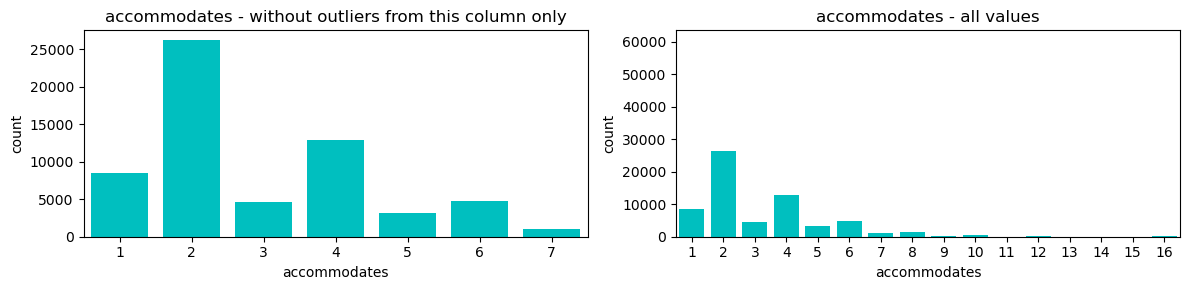

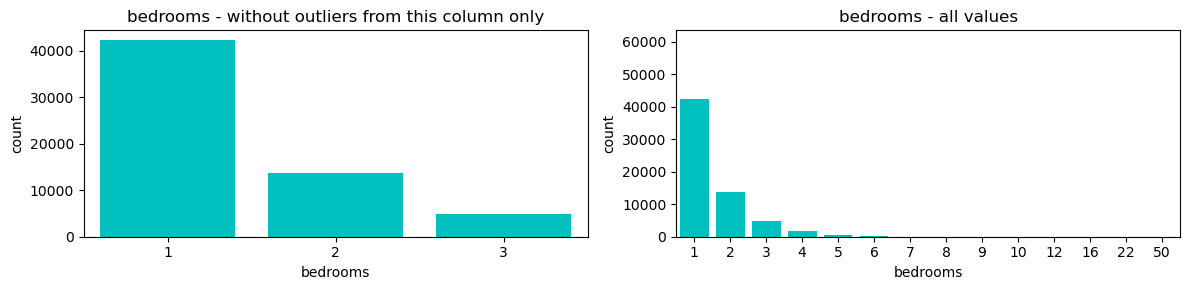

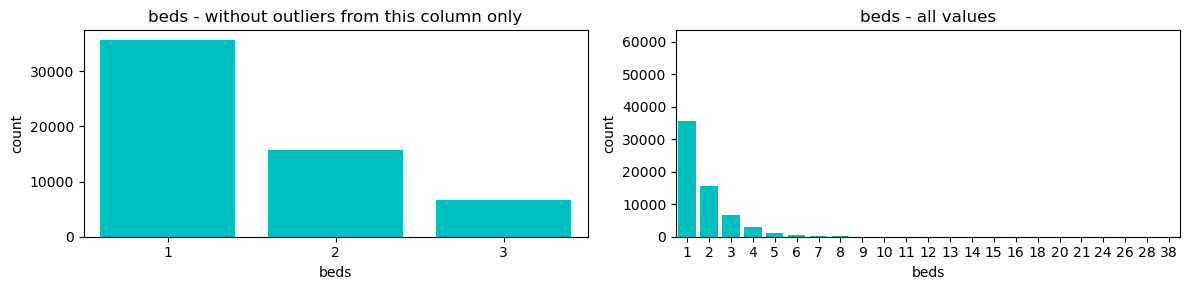

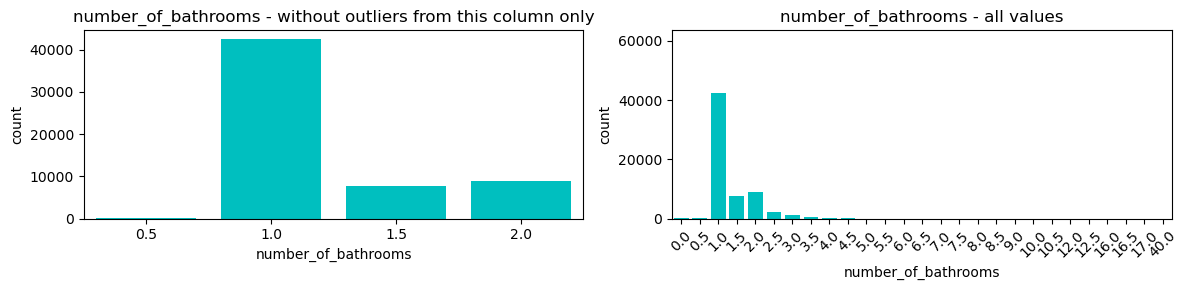

In [77]:
for column in outlier_info:
    # Filtering only columns with low cardinality.
    if df_data[column].nunique() < 50:
        plot_countplot(df_data, column,
                       outlier_info[column][0],
                       outlier_info[column][1],
                       'without outliers from this column only')
        print('\n')

Updating the outlier limit to encompass a few more of the visible values observed in the above graphs:

In [78]:
update_outlier_limits(outlier_info, df_data['accommodates'], 0, 10)
update_outlier_limits(outlier_info, df_data['bedrooms'], 0, 6)
update_outlier_limits(outlier_info, df_data['beds'], 0, 8)
update_outlier_limits(outlier_info, df_data['number_of_bathrooms'], 0, 4.5)

Proceeding to examine other numeric columns with more than 1% of outliers.  
The expanded visualization will stretch by 3 IQRs on each side, totaling 4.5 IQRs beyond the quartiles, to include a broader range of values.  
  
Note: although some columns consist of discrete values (integer values only), their high cardinality makes a bar graph unsuitable due to the large number of x-axis values. Therefore, histograms will be employed for discrete values, with the discrete=True configuration, to prevent any misleading gaps that may otherwise appear.

In [79]:
def plot_histplot(df, column,
                  zoom_name, zoom_range_min, zoom_range_max,
                  broader_view_name, broader_view_min, broader_view_max):
    """Plots 2 histograms, one  focusing on a smaller range of values and
    another showing a broader range of values.
    """
    fig, ax = plt.subplots(ncols=2, figsize=(18, 3))
    discrete = (True if pd.api.types.is_integer_dtype(df_data[column].dtype)
                else None)
    
    sns.histplot(df[column][(df[column] >= zoom_range_min)
                            & (df[column] <= zoom_range_max)],
                 ax=ax[0], color='c', alpha=1, discrete=discrete);
    
    sns.histplot(df[column][(df[column] >= broader_view_min)
                            & (df[column] <= broader_view_max)],
                 ax=ax[1], color='c', alpha=1, discrete=discrete);
    
    ax[0].set_title(column + ' - ' + zoom_name)
    ax[1].set_title(column + ' - ' + broader_view_name)
    
    plt.tight_layout()
    plt.show()

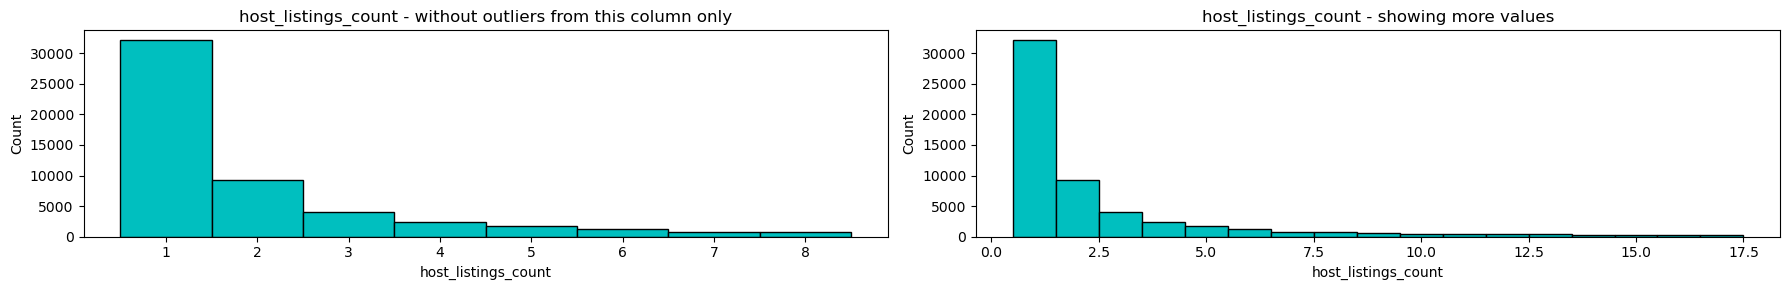

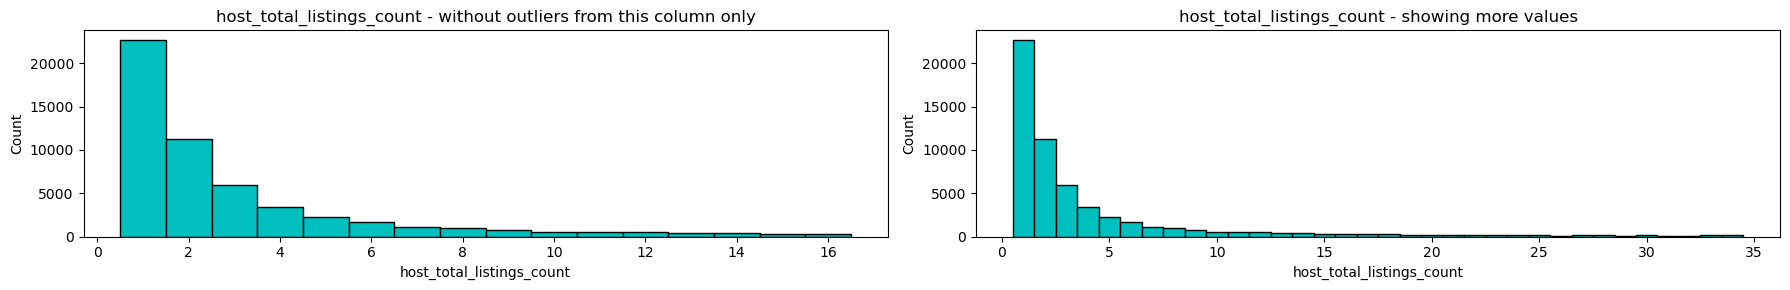

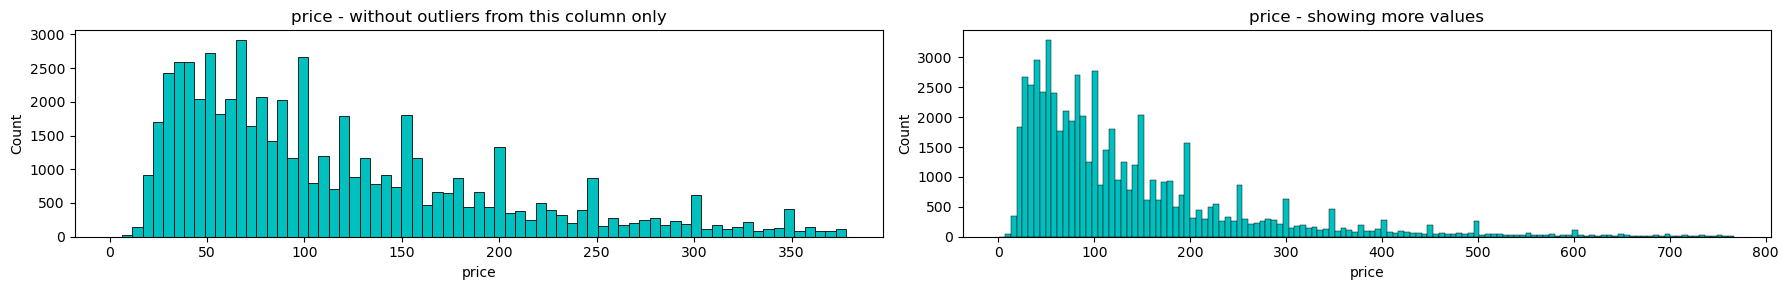

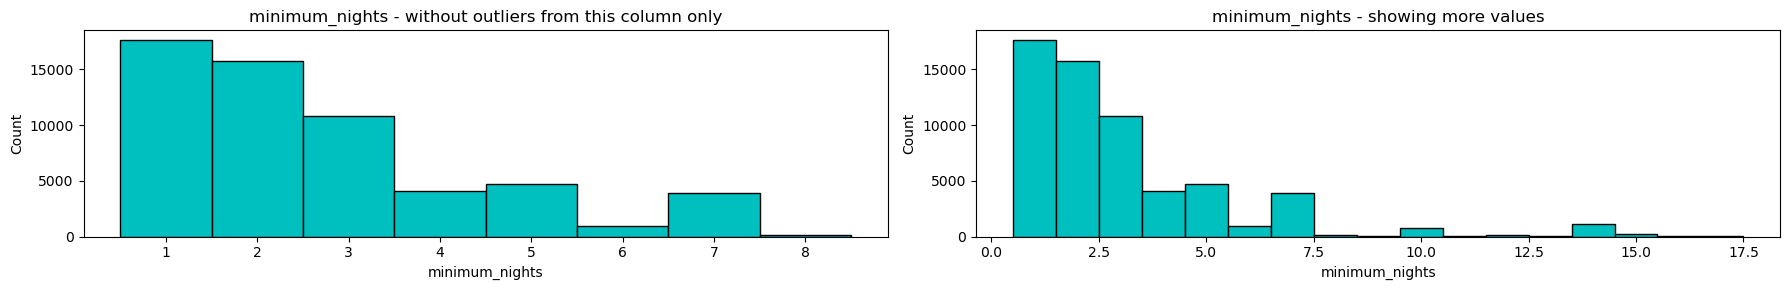

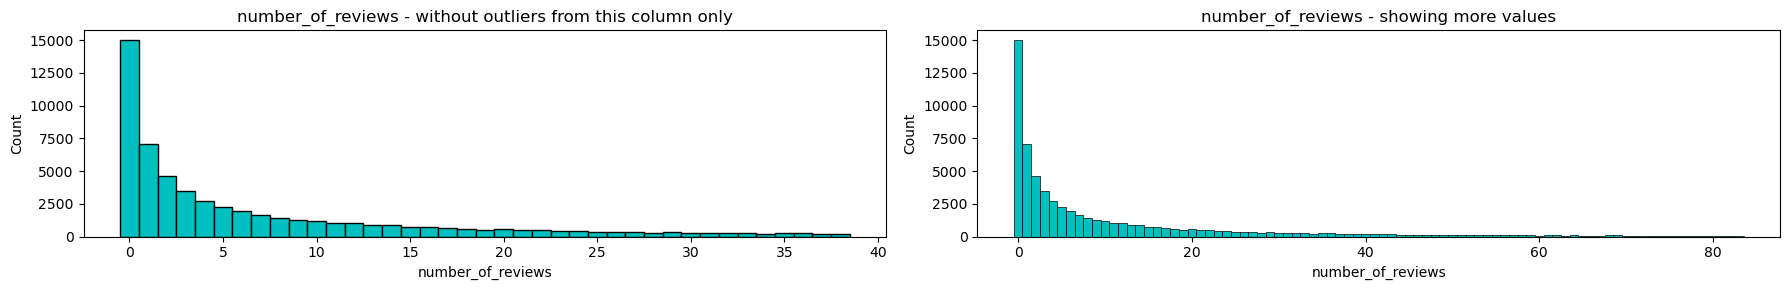

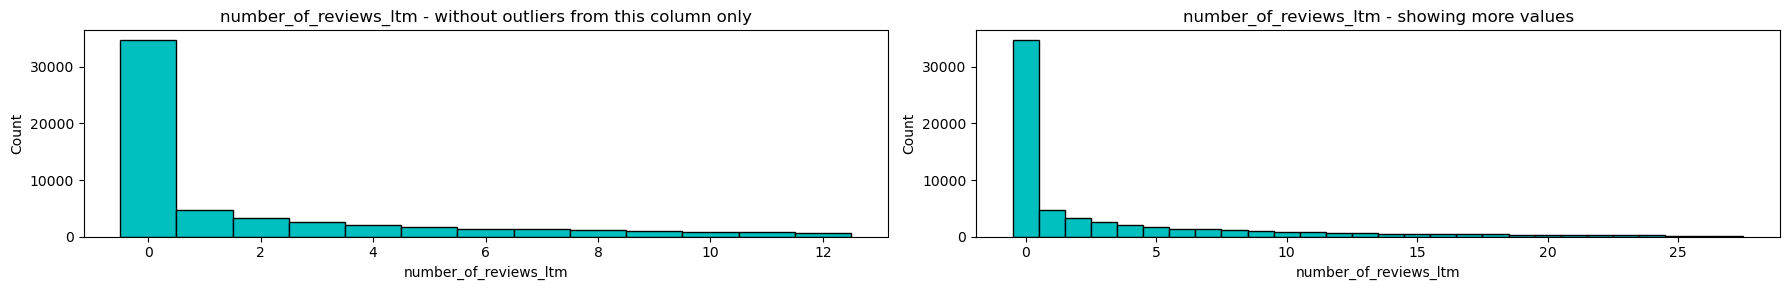

In [80]:
for column in outlier_info:
    if (df_data[column].nunique() >= 50
        and float((outlier_info[column][3]).strip('%')) >= 1):
        IQR = df_data[column].quantile(0.75) - df_data[column].quantile(0.25)
        plot_histplot(df_data, column,
                      'without outliers from this column only',
                      outlier_info[column][0], outlier_info[column][1],
                      'showing more values',
                      outlier_info[column][0] - 3*IQR,
                      outlier_info[column][1] + 3*IQR)

Updating outlier limit to include a few more of the visible values from the graphs above:

In [81]:
update_outlier_limits(outlier_info, df_data['host_listings_count'], 0, 20)
update_outlier_limits(outlier_info, df_data['host_total_listings_count'],0, 40)
update_outlier_limits(outlier_info, df_data['price'], 0, 800)
update_outlier_limits(outlier_info, df_data['minimum_nights'], 0, 20)
update_outlier_limits(outlier_info, df_data['number_of_reviews'], 0, 100)
update_outlier_limits(outlier_info, df_data['number_of_reviews_ltm'], 0, 30)

Checking updated outlier list:

In [82]:
print_outlier_info(outlier_info)

                             MIN (if not outlier)    MAX (if not outlier)    Count of Outliers    % of Outliers
-------------------------  ----------------------  ----------------------  -------------------  ---------------
      host_listings_count                    0.00                   20.00                 7180            11.3%
host_total_listings_count                    0.00                   40.00                 6550            10.3%
             accommodates                    0.00                   10.00                  356             0.6%
                 bedrooms                    0.00                    6.00                   69             0.1%
                     beds                    0.00                    8.00                  169             0.3%
                    price                    0.00                  800.00                 1658             2.6%
           minimum_nights                    0.00                   20.00                 2663          

Revisiting any columns with more than 10% outliers:  
'host_listings_count' and 'host_total_listings_count'.  
  
In this iteration, the expanded visualization will include 97% of the values.

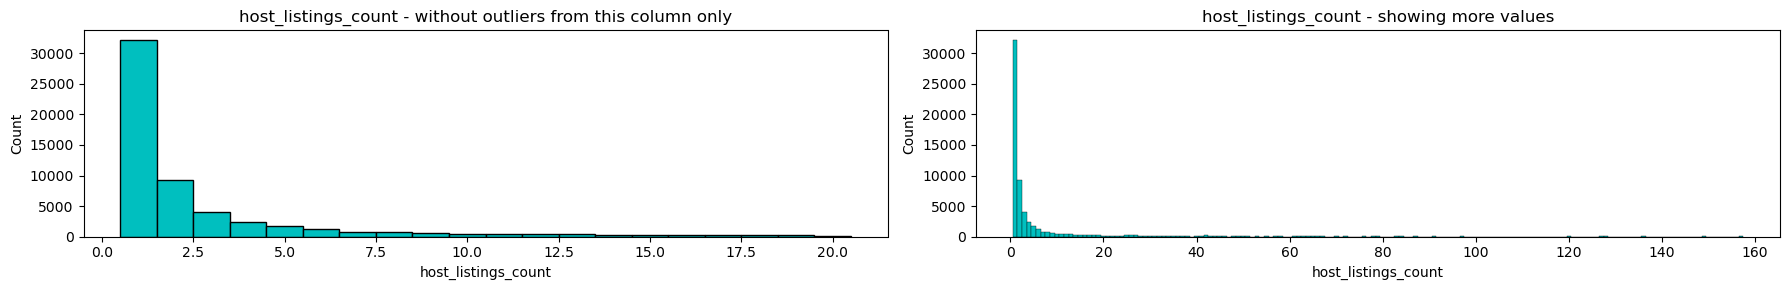

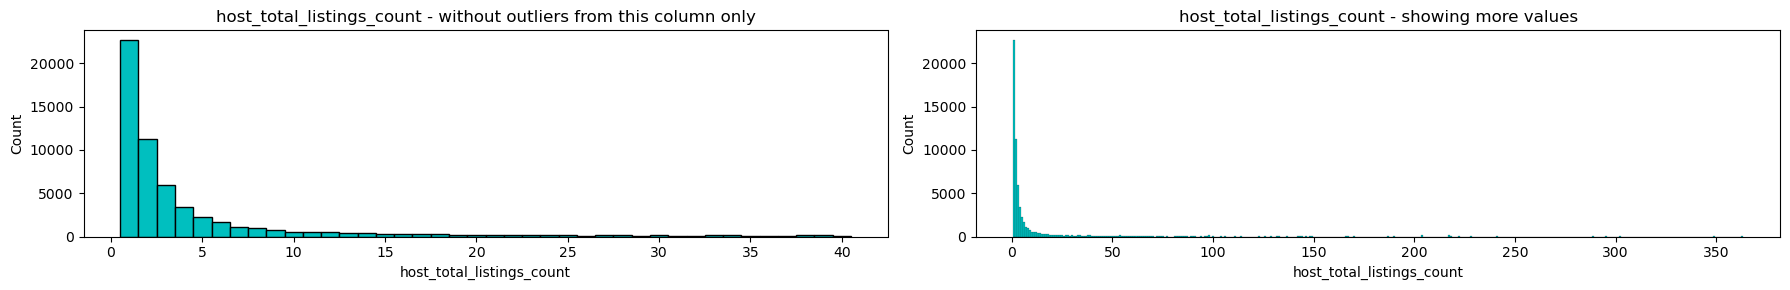

In [83]:
for column in outlier_info:
    if float((outlier_info[column][3]).strip('%')) >= 10:
        plot_histplot(df_data, column,
                      'without outliers from this column only',
                      outlier_info[column][0], outlier_info[column][1],
                      'showing more values',
                      df_data[column].min(), df_data[column].quantile(0.97))

Updating the outlier limit to incorporate the values displayed in the graphs above:

In [84]:
update_outlier_limits(
    outlier_info, df_data['host_listings_count'], 0, 180)
update_outlier_limits(
    outlier_info, df_data['host_total_listings_count'], 0, 400)

Reviewing the updated outlier list:

In [85]:
print_outlier_info(outlier_info)

                             MIN (if not outlier)    MAX (if not outlier)    Count of Outliers    % of Outliers
-------------------------  ----------------------  ----------------------  -------------------  ---------------
      host_listings_count                    0.00                  180.00                 1503             2.4%
host_total_listings_count                    0.00                  400.00                 1777             2.8%
             accommodates                    0.00                   10.00                  356             0.6%
                 bedrooms                    0.00                    6.00                   69             0.1%
                     beds                    0.00                    8.00                  169             0.3%
                    price                    0.00                  800.00                 1658             2.6%
           minimum_nights                    0.00                   20.00                 2663          

Introducing a new column 'outlier_check' to visualize outliers.  
  
This column will list the columns containing outlier values for each row, or 'No' if no outliers are present.

In [86]:
def register_outliers(row, outlier_info):
    """ Generates a list of columns containing outliers in each row.  
    
    If there is no outlier in inputed row, returns 'No'.
    """
    outlier_check = []
    for column in outlier_info:
        if ((row[column] < outlier_info[column][0])
              or (row[column] > outlier_info[column][1])):
            outlier_check.append(column)
    
    if outlier_check:
        return ', '.join(outlier_check + [''])
    else:
        return 'No'

In [87]:
df_data['outlier_check'] = df_data.apply(
    lambda row: register_outliers(row, outlier_info), axis=1)
print('Not outliers (percentage of database):',
      format(df_data[df_data['outlier_check'] == 'No'].shape[0]
             / df_data.shape[0], '.1%'))

Not outliers (percentage of database): 85.8%


# 4.0 Data Analysis

At this stage, we have a clean and organized database, allowing us to begin addressing the proposed questions.

### Question 1.	What is the price distribution of Airbnb properties?

The distribution of prices is positively skewed, with the majority of prices below \\$100, which represents the most frequent price point.  
Prices up to \\$200 are also notably common.  
<br>
The following graph illustrates the distribution of prices using a histogram.  

In [88]:
def plot_histplot_without_and_with_outliers(df, column):
    """Plots 2 histograms (without outliers and all values)."""
    fig, ax = plt.subplots(ncols=2, figsize=(12, 3))
    
    sns.histplot(df[(df['outlier_check'] == 'No')][column],
                 ax=ax[0], color='c', alpha=1, bins=50);
    
    sns.histplot(df[column],
                 ax=ax[1], color='c', alpha=1, bins=50);
    
    ax[0].set_title(column + ' - without outliers')
    ax[1].set_title(column + ' - all values')
    
    plt.tight_layout()
    plt.show()

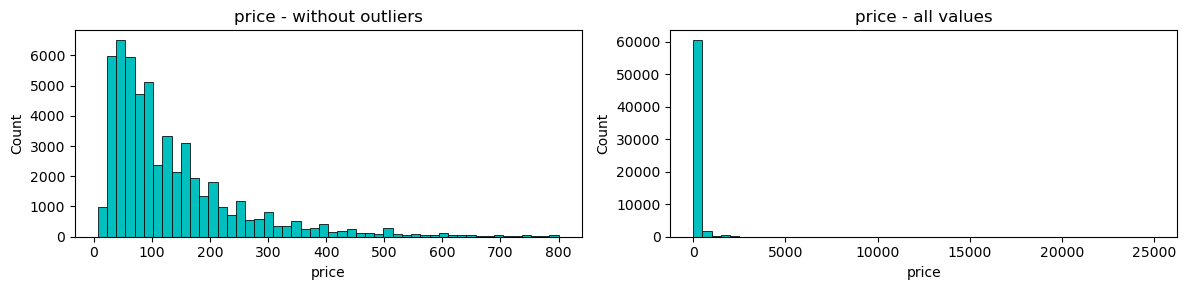

In [89]:
plot_histplot_without_and_with_outliers(df_data, 'price')

Displaying descriptive statistics of the Price column without outliers and most common prices.

In [90]:
print(df_data[df_data['outlier_check'] == 'No'].price.describe())
print('\n\nMost common prices:')
print(df_data[df_data['outlier_check'] == 'No']['price']
      .value_counts(sort=True).head(10))

count    54464.000000
mean       134.583982
std        118.145698
min          7.000000
25%         55.000000
50%         99.000000
75%        172.000000
max        800.000000
Name: price, dtype: float64


Most common prices:
100.0    1517
50.0     1369
150.0    1348
40.0     1307
60.0     1225
80.0     1172
120.0    1137
35.0     1107
45.0     1035
70.0     1030
Name: price, dtype: int64


### Question 2.	How do prices vary depending on how many people the property accommodates?

Based on the findings from question 1, visualizing the price distribution becomes challenging when outliers are included.  
Therefore, this question will be addressed by excluding outliers.

Prices tend to increase for properties that accommodate more people, although there is considerable variability.  

For a visual representation of this, boxplots showing price values for each value of 'accommodates' are displayed.  
It's worth noting that, in general, as the accommodation capacity increases, the number of properties with such capacity tends to decrease.
  
Note: only extreme values (over 4.5 IQRs beyond the quartiles for 'price' values) were excluded as outliers.  
Therefore, many instances still appear as outliers in the boxplots, as the boxplot limit for outliers is set to 1.5 IQR beyond the quartiles.

In [91]:
def plot_nice_boxplots(df, x_column, y_column):
    """Plots horizontal boxplots showing the distribution of x_column.  
    
    Horizontal boxplots will be plotted to display the distribution of the
    values in the x_column. Each boxplot will represent a different value
    of the y_column, with the color intensity indicating the frequency of
    each y_column value.
    """
    y_column_counts = df[y_column].value_counts().sort_index()
    # Creating a pallete based on the frequency of values in 'y_column'.
    # Colors become more intense for values with higher frequencies.
    freq_palette = [sns.color_palette('light:c',
                                      y_column_counts.max())[i-1]
                    for i in y_column_counts]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    # Ploting the boxplot in ax[0]
    # Order is explicitly declared to make sure it matches the palette
    sns.boxplot(data=df, x=x_column,
                y=y_column, order=y_column_counts.index.to_list(),
                palette=sns.color_palette(freq_palette),
                saturation=1, orient='h', ax=ax[0])
    # Ploting a personalized legend for the boxplot in ax[1]
    ax[1].add_patch(plt.Rectangle((0, 0), 1, 0.2, color='white'))
    # As the rectangle is constructed from the bottom up,
    # freq_palette and y_column_counts will be accessed in reverse order.
    for i, color in enumerate(sns.color_palette(freq_palette[::-1])):
        ax[1].add_patch(plt.Rectangle((0, 0.2+i), 1, 0.6,
                                      color=color, alpha=1))
        ax[1].add_patch(plt.Rectangle((0, 0.8+i), 1, 0.4, color='white'))
        ax[1].add_patch(plt.Rectangle((1, i), 1, 1, color='white'))
        ax[1].text(1.5, 0.4+i,
                   str('{0:.1f}k'.format(y_column_counts.iloc[-i-1]/1000)),
                ha='left', va='center')

    # Set axis limits and remove ticks.
    ax[1].set_ylim(0, len(y_column_counts))
    ax[1].set_xlim(0, 25)
    ax[1].axis('off')

    ax[0].text(0, len(y_column_counts)+1.2,
               'Note: color intensity is proportional to property count.',
               fontsize='small', color='gray')
    ax[1].text(0, 0.5 + len(y_column_counts),
               'Property count:')

    plt.show()

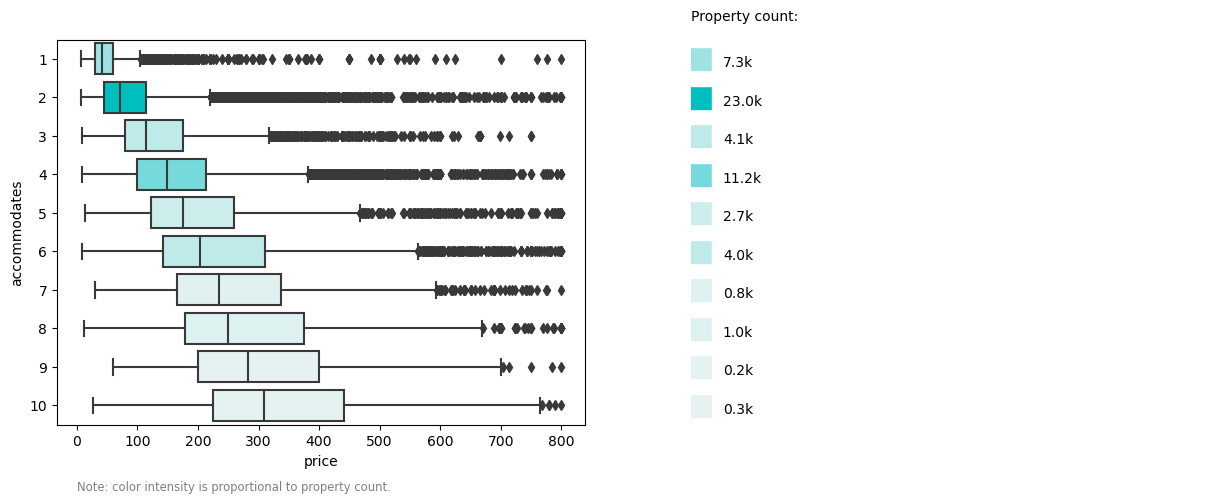

In [92]:
plot_nice_boxplots(df_data[(df_data['outlier_check'] == 'No')], 'price', 'accommodates')

For additional insight, supplementary material has been appended to this EDA (Extras - Price distribution for each neighbourhood).  
It presents the price distribution using horizontal boxplots, with each plot focusing on one neighborhood at a time.  

### Question 3.	What are the most common number for minimum and maximum of nights permitted?

Most properties permit both short and long stays.  
  
The minimum stay is most commonly 1 night, followed by 2 nights, together accounting for over half of the cases.  
For maximum stays, the most common values are 1125 and 365 nights, also representing more than half of the cases.

In [93]:
print('Most common number of minimum nights permitted: \n')
for number_of_nights, count in Counter(df_data['minimum_nights']
                                       .tolist()).most_common(5):
    print('{:5d}'.format(number_of_nights) + ' night'
          + ('s' if number_of_nights > 1 else ' '), '--> ',
          '{:5.2f}%'.format(100*count/df_data.shape[0]) + ' of cases')
print('\n\n')

print('Most common number of maximum nights permitted: \n')
for number_of_nights, count in Counter(df_data['maximum_nights']
                                       .tolist()).most_common(5):
    print('{:5d}'.format(number_of_nights) + ' night'
          + ('s' if number_of_nights > 1 else ' '), '--> ',
          '{:5.2f}%'.format(100*count/df_data.shape[0]) + ' of cases')

Most common number of minimum nights permitted: 

    1 night  -->  27.75% of cases
    2 nights -->  24.84% of cases
    3 nights -->  17.02% of cases
    5 nights -->   7.41% of cases
    4 nights -->   6.47% of cases



Most common number of maximum nights permitted: 

 1125 nights -->  43.08% of cases
  365 nights -->  19.50% of cases
   30 nights -->   5.05% of cases
   14 nights -->   3.54% of cases
   90 nights -->   3.22% of cases


### Question 4.	What are the cheapest and the most expensive locations for renting a property?

Based on the findings from question 1, visualizing the price distribution becomes challenging when outliers are included.  
Therefore, this question will be addressed initially by excluding outliers.

Expensive and affordable properties are scattered across London, with certain areas tending to command higher or lower prices.
  
From a **neighborhood perspective**, the three most expensive areas are City of London, Kensington and Chelsea, and Westminster.  
These neighborhoods exhibit a considerable difference in mean prices compared to others.
  
Conversely, the three most affordable neighborhoods are Croydon, Sutton, and Lewisham.  
However, the difference in mean prices compared to the other most affordable neighborhoods is not as significant.

In [94]:
def plot_nice_barplot(df, x_column, y_column, title, order_by='x_asc',
                      label_rotation=None, annotate_precision='.0f',
                      errorbar=('ci', 95), fig_height=3):
    """Plots a graph bar with mean values.  
    
    Accepts sorting by either x value (x_asc or x_desc) or y value (y_asc
    or y_desc).
    """
    valid_orders = {'x_asc', 'x_desc', 'y_asc', 'y_desc'}
    if order_by not in valid_orders:
        raise ValueError('order_by: must be one of %r.' % valid_orders)
    elif order_by == 'y_desc':
        base = (df.groupby([x_column])[y_column].mean()
                .sort_values(ascending=False))
    elif order_by == 'y_asc':
        base = (df.groupby([x_column])[y_column].mean()
                .sort_values(ascending=True))
    elif order_by == 'x_desc':
        base = (df.groupby([x_column])[y_column].mean()
                .sort_index(ascending=False))
    else:
        base = (df.groupby([x_column])[y_column].mean()
                .sort_index(ascending=True))

    fig, ax = plt.subplots(figsize=((5 if base.count() < 10
                                       else 5*(base.count()//10)), fig_height))

    # Although estimator='mean' is a default setting, it is being explicitly
    # declared to ensure that annotations will function properly.
    sns.barplot(x=df[x_column], y=df[y_column], color='c', saturation=1,
                     order = base.index.to_list(), errorbar=errorbar,
                     estimator='mean', ax=ax)
    
    for i, index in enumerate(base.index.to_list()):
        ax.annotate(format(base.values[i], annotate_precision),
                    (i, base.values[i]), ha='center',
                    xytext=(0, 5), textcoords='offset points')
    ax.yaxis.set_visible(False)
    ax.set_title(title)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if label_rotation is not None:
        ax.tick_params(labelrotation=label_rotation)

    plt.show()

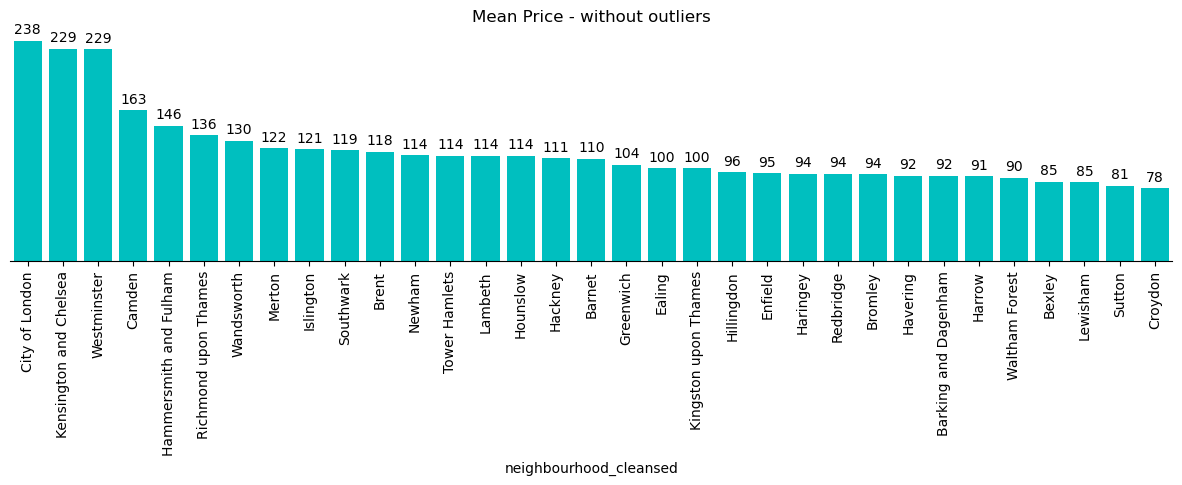

In [95]:
plot_nice_barplot(df_data[(df_data['outlier_check'] == 'No')],
                  'neighbourhood_cleansed', 'price', 'Mean Price - without outliers', 'y_desc',
                  label_rotation=90, errorbar=None)

**Spatial distribution**, illustrated in the maps below, provides another perspective on price variation.
  
This map emphasizes that the vicinity of Buckingham Palace tends to command higher prices, while lower prices are typically found farther away from Buckingham Palace. Additionally, it reinforces the earlier observation that London exhibits a mix of both expensive and affordable properties spread across the city.

In [96]:
print('\nSpatial distribution - without outliers')
sample_df = df_data[(df_data['outlier_check'] == 'No')].sample(n=2500,
                                                            random_state=777)

map_xl = px.scatter_mapbox(sample_df, lat='latitude', lon='longitude',
                           color='price', center=map_center, zoom=10.5,
                           mapbox_style='carto-positron')
remove_white_borders(map_xl)

map_xl.show()


Spatial distribution - without outliers


Now, let's turn our attention to the outliers, which can reach prices as high as \$25000.
  

  
Starting with values up to $5000 per night:

* There is a notable concentration of properties priced close to \$1000, particularly in the vicinity of Buckingham Palace.  
    * Despite comprising only around 2\% of the database, these instances are quite numerous, totaling around 1000 instances.

* Several regions exhibit clusters of similar prices, such as:
    * Approximately 50 properties near Blackfriars Crown Court with nightly prices close to \$1500.
    * Approximately 50 properties near Wembley Stadium with nightly prices close to \$1500.
    * Over 10 properties near Vincent Square with nightly prices close to \$1500.
    * Four properties near two specific blocks of Kingsland Road with nightly prices around \$5000.
          
        

In [97]:
print('\nShowing price outliers - max price 5k')
sample_df = df_data[(df_data['price'] > outlier_info['price'][1])
                 & (df_data['price'] < 5000)]

map_xl = px.scatter_mapbox(sample_df, lat='latitude', lon='longitude',
                           color='price', center=map_center, zoom=10.5,
                           mapbox_style='carto-positron')
remove_white_borders(map_xl)

map_xl.show()


Showing price outliers - max price 5k


In [98]:
# px.scatter_mapbox does not support subplots. To create subplots,
# this block of code will utilize go.Scattermapbox
print('\n\nDisplaying regions with clusters of similar prices as mentioned:')
fig = go.Figure()
customdata_set = list(sample_df[[
    'latitude',
    'longitude',
    'price',
    'name',
    ]].to_numpy())
# Plotting 4 maps
for i in range(0, 4):
    fig.add_trace(
        go.Scattermapbox(
            lat=sample_df.latitude,
            lon=sample_df.longitude,
            mode='markers',
            marker=go.scattermapbox.Marker(
                color=sample_df.price,
            ),
            subplot='mapbox'+str(i+1),
            customdata = customdata_set,
            hovertemplate=('<b>Latitude:</b>: %{customdata[0]}<br>'
                           +'<b>Longitude:</b>: %{customdata[1]}<br>'
                           +'<b>Price:</b>: %{customdata[2]}<br>'
                           +'<b>Name:</b>: %{customdata[3]}<br>'
            ),
        )
    )
price_cluster_locations = {
    1: {'lat': 51.502, 'lon': -0.100},
    2: {'lat': 51.560, 'lon': -0.279},
    3: {'lat': 51.496, 'lon': -0.131},
    4: {'lat': 51.533, 'lon': -0.077},
}
config_maps = {}
for i in range(0, 4):
    config_maps['mapbox'+str(i+1)] = dict(
        style='carto-positron',
        domain={'x': [(i)*0.25+0.01, (i+1)*0.25], 'y': [0.3, 0.7]},
        center=price_cluster_locations[i+1],
        zoom=13,
    )
    
fig.update_layout(**config_maps)
# Adding annotation texts
for text_and_pos in ((
        ('Blackfriars<br>Crown<br>Court', 0.01),
        ('Wembley<br>Stadium', 0.26),
        ('Vincent<br>Square', 0.53),
        ('Kingsland<br>Road', 0.82),
        )):
    fig.add_annotation(x=text_and_pos[1], y=0.82,
                       text=text_and_pos[0],
                       showarrow=False,
                       align='left',
                      )
# Adjusting size of the image
fig.update_layout(autosize=False,
                  width=900,
                  height=400,
                 )
fig.update_layout(showlegend=False)
remove_white_borders(fig)
fig.show()



Displaying regions with clusters of similar prices as mentioned:


For values exceeding \$5000, a handful of specific cases exist, as depicted in the map below:

In [99]:
print('\nShowing price outliers - 5k to 25k')
sample_df = df_data[df_data['price'] >= 5000]

map_xl = px.scatter_mapbox(sample_df, lat='latitude', lon='longitude',
                           color='price', center=map_center, zoom=10.5,
                           mapbox_style='carto-positron')
remove_white_borders(map_xl)

map_xl.show()


Showing price outliers - 5k to 25k


### Question 5.	What are the most common amenities offered by the hosts?

Most common amenities are Wifi, Kitchen, Smoke alarm, Essentials, Long term stays allowed, Heating, Washer, Hangers, Iron, Hair dryer, Carbon monoxide alarm, Hot water, Shampoo, Dishes and silverware, Refrigerator, Cooking basics, Tv, Bed linens, Microwave and Oven.  
<br>
These amenities represent the most frequently inputted items by hosts. However, it's important to note that the count of these items is not entirely precise, as hosts may input the same information in various ways. The simple treatment applied up to this point may not be able to detect some different inputs that refer to the same items.

In [100]:
# Generating a list of amenities including duplicates.  
# Amenities will be stored in this list after removing noise.
list_count_amenities = []

for row in df_data['amenities']:
    for amenitie in transform_text_to_list(row):
        amenitie = process_amenitie_text(amenitie)
        if amenitie:
            list_count_amenities.append(amenitie)

print('Most popular amenities: \n')
for amenitie, count in Counter(list_count_amenities).most_common(20):
    print('{:25s}'.format(amenitie),
          '--> appears', '{:6.0f}'.format(count), 'times')

Most popular amenities: 

Wifi                      --> appears  58519 times
Kitchen                   --> appears  57499 times
Smoke alarm               --> appears  56281 times
Essentials                --> appears  54925 times
Long term stays allowed   --> appears  52681 times
Heating                   --> appears  48594 times
Washer                    --> appears  46624 times
Hangers                   --> appears  46361 times
Iron                      --> appears  46069 times
Hair dryer                --> appears  42235 times
Carbon monoxide alarm     --> appears  39749 times
Hot water                 --> appears  38389 times
Shampoo                   --> appears  36861 times
Dishes and silverware     --> appears  33973 times
Refrigerator              --> appears  32994 times
Cooking basics            --> appears  31479 times
Tv                        --> appears  31436 times
Bed linens                --> appears  30308 times
Microwave                 --> appears  27478 times
Oven 

### Question 6.	What is the relation between number of reviews and the overall review rating?

In [101]:
print('Correlation (including outliers): ', format(
      df_data['number_of_reviews'].corr(
          df_data['review_scores_rating']), '.2%'))

print('Correlation (without outliers): ', format(
    df_data[(df_data['outlier_check'] == 'No')]['number_of_reviews'].corr(
        df_data[(df_data['outlier_check'] == 'No')]
        ['review_scores_rating']), '.2%'))

Correlation (including outliers):  9.20%
Correlation (without outliers):  13.29%


While there is a very weak correlation between the number of reviews and the overall review rating, it's clear that properties with low review ratings tend to have fewer reviews.  
  
This observation suggests that low ratings may lead guests to select alternative properties, resulting in only those properties with at least satisfactory ratings continuing to attract new guests and continuing to receive reviews.

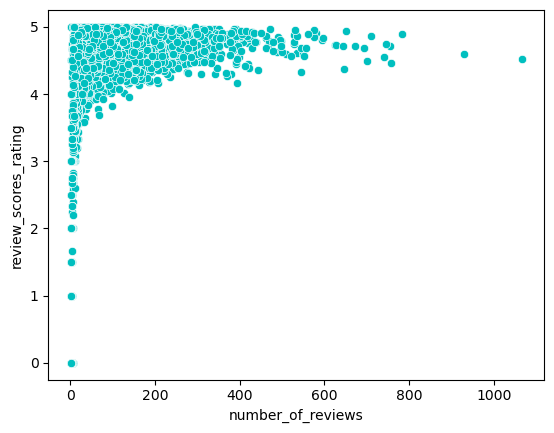

In [102]:
sns.scatterplot(data=df_data, x='number_of_reviews', y='review_scores_rating',
                color='c', alpha=1);

Similarly, the predominance of high review ratings supports this trend, with most ratings clustering near the maximum value of 5.  
The boxplot displays the distribution of all review ratings, while the histogram focuses specifically on ratings within the range of 4 to 5.

Note: boxplots and histograms serve to illustrate more effectively the distribution of review ratings.  
Unlike the scatter plot, which may obscure the density of points, the boxplot and histogram provide a clearer depiction of how ratings are distributed across different ranges.



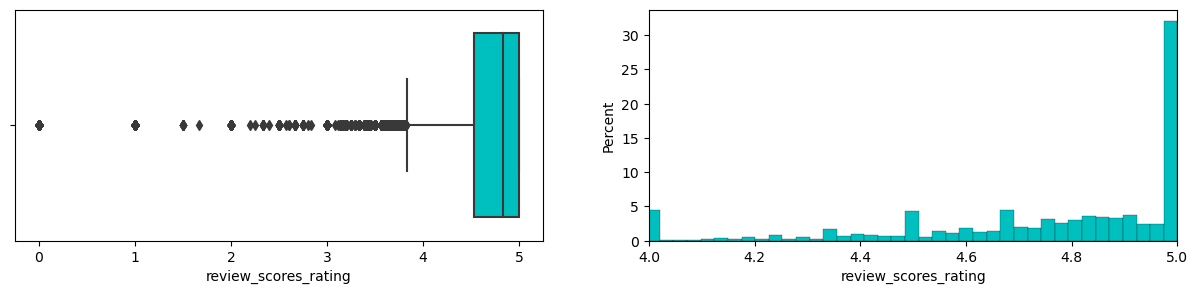

In [103]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 3))
sns.boxplot(data=df_data, x='review_scores_rating', ax=ax[0], orient ='h',
            color='c', saturation=1);
sns.histplot(data=df_data, x='review_scores_rating', ax=ax[1], stat='percent',
            color='c', alpha=1);

ax[1].set_xlim(4, 5)
plt.show()

### Question 7.	What is the relation between a property being enabled for instant booking and number of reviews per month?

Properties that are instant bookable tend to receive more reviews per month.
The observed difference is statistically significant, as indicated by the absence of intersection between the 95% confidence intervals.
  
One plausible explanation is that individuals who are enthusiastic about digital solutions prefer instant booking for its ease and speed, while also recognizing that online reviews often mitigate overall risks.
  
The digital-oriented culture likely underlies the occurrence of properties that are instant bookable and receive more reviews per month.

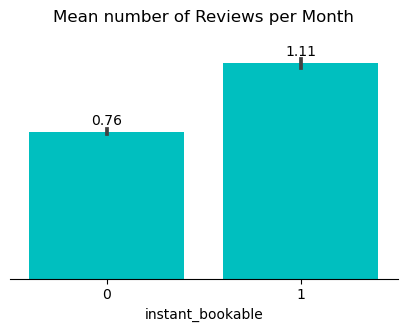

In [104]:
plot_nice_barplot(df_data, 'instant_bookable', 'reviews_per_month',
                  'Mean number of Reviews per Month\n', 'x_asc',
                  annotate_precision='.2f')

### Question 8.	Do properties with shared bathrooms receive lower overall review ratings?

No, they don't.  
  
One probable explanation for this observation is that guests who book properties with shared bathrooms are aware of this arrangement beforehand and factor it into their expectations. As a result, the shared bathroom does not substantially impact their overall review ratings.  

Note: Due to the overlap of the 95% confidence intervals, a statistical test is required to confirm the lack of statistical significance.  
The Welch's t-test presented below indicates the difference is marginally insignificant (p-value = 0.067 is greater than 0.05).  
Additionally, the effect size is very small, rated as trivial according to Cohen's d (0.013).  
A small effect size means that even if the difference were statistically significant, it would not have practical significance.

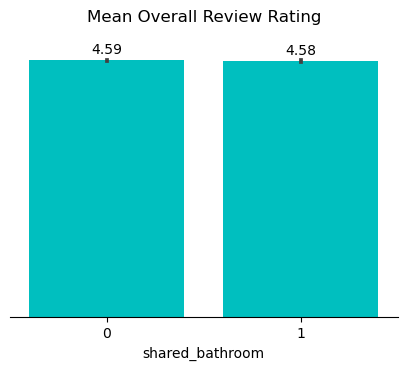

In [105]:
plot_nice_barplot(df_data, 'shared_bathroom', 'review_scores_rating',
                  'Mean Overall Review Rating\n', 'x_asc',
                  annotate_precision='.2f', fig_height=3.5)

Performing a Welch's t-test to assess the statistical significance of the difference in mean values.

In [106]:
def one_tailed_unequal_variance_t_test(sample_A, sample_B):
    """Performs an one-tailed unequal variance t-test (Welch's t-test).  
    
    Receives two samples (type pandas.core.series.Series) and prints the
    result of the test.  
    
    Null hypothesis H0:
        μB - μA >= 0
    Alternative hypothesis Ha:
        μB - μA < 0
    """
    # Gathering data for the test.
    sample_a_mean = sample_A.mean()
    sample_b_mean = sample_B.mean()
    populational_mean_diff = 0 # Zero as per hypotheses.
    sample_a_size = sample_A.shape[0]
    sample_b_size = sample_B.shape[0]
    std_a = sample_A.std() # sample standard deviation
    std_b = sample_B.std() # sample standard deviation

    # Pooled standard error (it will be the denominator of Welch's t-test)
    pooled_se = (((std_a**2)/sample_a_size + (std_b**2)/sample_b_size)
                  ** 0.5)

    # Welch's t-test statistic
    t_statistic = ((sample_b_mean-sample_a_mean - populational_mean_diff)
                     / pooled_se)
    print(f'T-statistic = {t_statistic:.4f}')
    
    # Degrees of freedom
    a = (std_a**2) / sample_a_size
    b = (std_b**2) / sample_b_size
    df = (((a+b)**2)
          / (((a**2)/(sample_a_size-1)) + ((b**2)/(sample_b_size-1))))

    # P-value
    p_value = stats.t.cdf(t_statistic, df=df)
    print(f'P-value = {p_value:.8f}')
    
    # Effect size
    d = (sample_a_mean-sample_b_mean) / ((std_a**0.5 + std_b**0.5)/2)**0.5
    effect_size_text = ('trivial' if d < 0.2
                        else ('small' if d < 0.5
                              else ('moderate'if d < 0.8
                                    else 'large')))
    print(f"Effect size: {effect_size_text} (Cohen's d = {d:.3f})")

Sample_A = properties where bathrooms are NOT shared  
Sample_B = properties where bathrooms are shared  
  
**Null hypothesis H0**: μB - μA >= 0  
    Shared bathrooms receive EQUAL OR HIGHER overall review ratings.  
  
**Alternative hypothesis Ha**: μB - μA < 0  
Shared bathrooms receive LOWER overall review ratings.

In [111]:
one_tailed_unequal_variance_t_test(
    df_data[df_data['shared_bathroom'] == 0]['review_scores_rating'],
    df_data[df_data['shared_bathroom'] == 1]['review_scores_rating'],
)

T-statistic = -1.5002
P-value = 0.06679202
Effect size: trivial (Cohen's d = 0.013)


## Extras - Price distribution for each neighbourhood

The neighborhoods are showed from the lowest to the highest mean price.

In [108]:
def plot_many_boxplots(df, boxplot_x, boxplot_y, detail_column,
                       plot_cols=4, set_x_lim=None):
    """Plots horizontal boxplots for each value of 'detail_column' in 'df'.  
    
    For each value of 'detail_column', horizontal bloxplots will show the
    distribution of boxplot_x values for each value of boxplot_y.  
    Values of 'detail_column' will be ordered from  the lowest mean value
    of boxplot_x to the highest mean value of boxplot_x.  
    
    Subplots will be created with number of cols defined by 'plot_cols'.  
    
    If 'set_x_lim' is specified, all histograms will have the lower limit
    set to zero and the upper limit set to the value of 'set_x_lim'.
    """
    plot_lines = (df[detail_column].nunique()//plot_cols
                  + (df[detail_column].nunique()%plot_cols > 0))
    
    fig, ax = plt.subplots(nrows=plot_lines, ncols=plot_cols,
                           figsize=(18, 4*(plot_lines)))
    
    # 'base' will be used to define the order of the plots ranging from the 
    # detail_column with the lowest mean value of boxplot_x to the highest
    # mean value of boxplot_x.
    base = (df.groupby([detail_column])[boxplot_x]
            .mean().sort_values(ascending=True).index.to_list())
    
    print('\nEach visualization corresponds to a different value of '
          + detail_column +':\n\n')
    for i, detail_value in enumerate(base):
        sns.boxplot(data=df[df[detail_column] == detail_value],
                    ax=ax[i//plot_cols, i%plot_cols],
                    x=boxplot_x, y=boxplot_y, color='c', saturation=1,
                    orient='h');
        ax[i//plot_cols, i%plot_cols].title.set_text(str(detail_value))
        if set_x_lim is not None:
            ax[i//plot_cols, i%plot_cols].set_xlim(0, set_x_lim)

    if df[detail_column].nunique()%plot_cols != 0:
        for i in range(plot_cols - (df[detail_column].nunique())%plot_cols):
            fig.delaxes(ax[(df[detail_column].nunique())//plot_cols,
                           (df[detail_column].nunique())%plot_cols+i])

    plt.tight_layout()
    plt.show()

Showing boxplots for each neighbourhood - **without outliers**:


Each visualization corresponds to a different value of neighbourhood_cleansed:




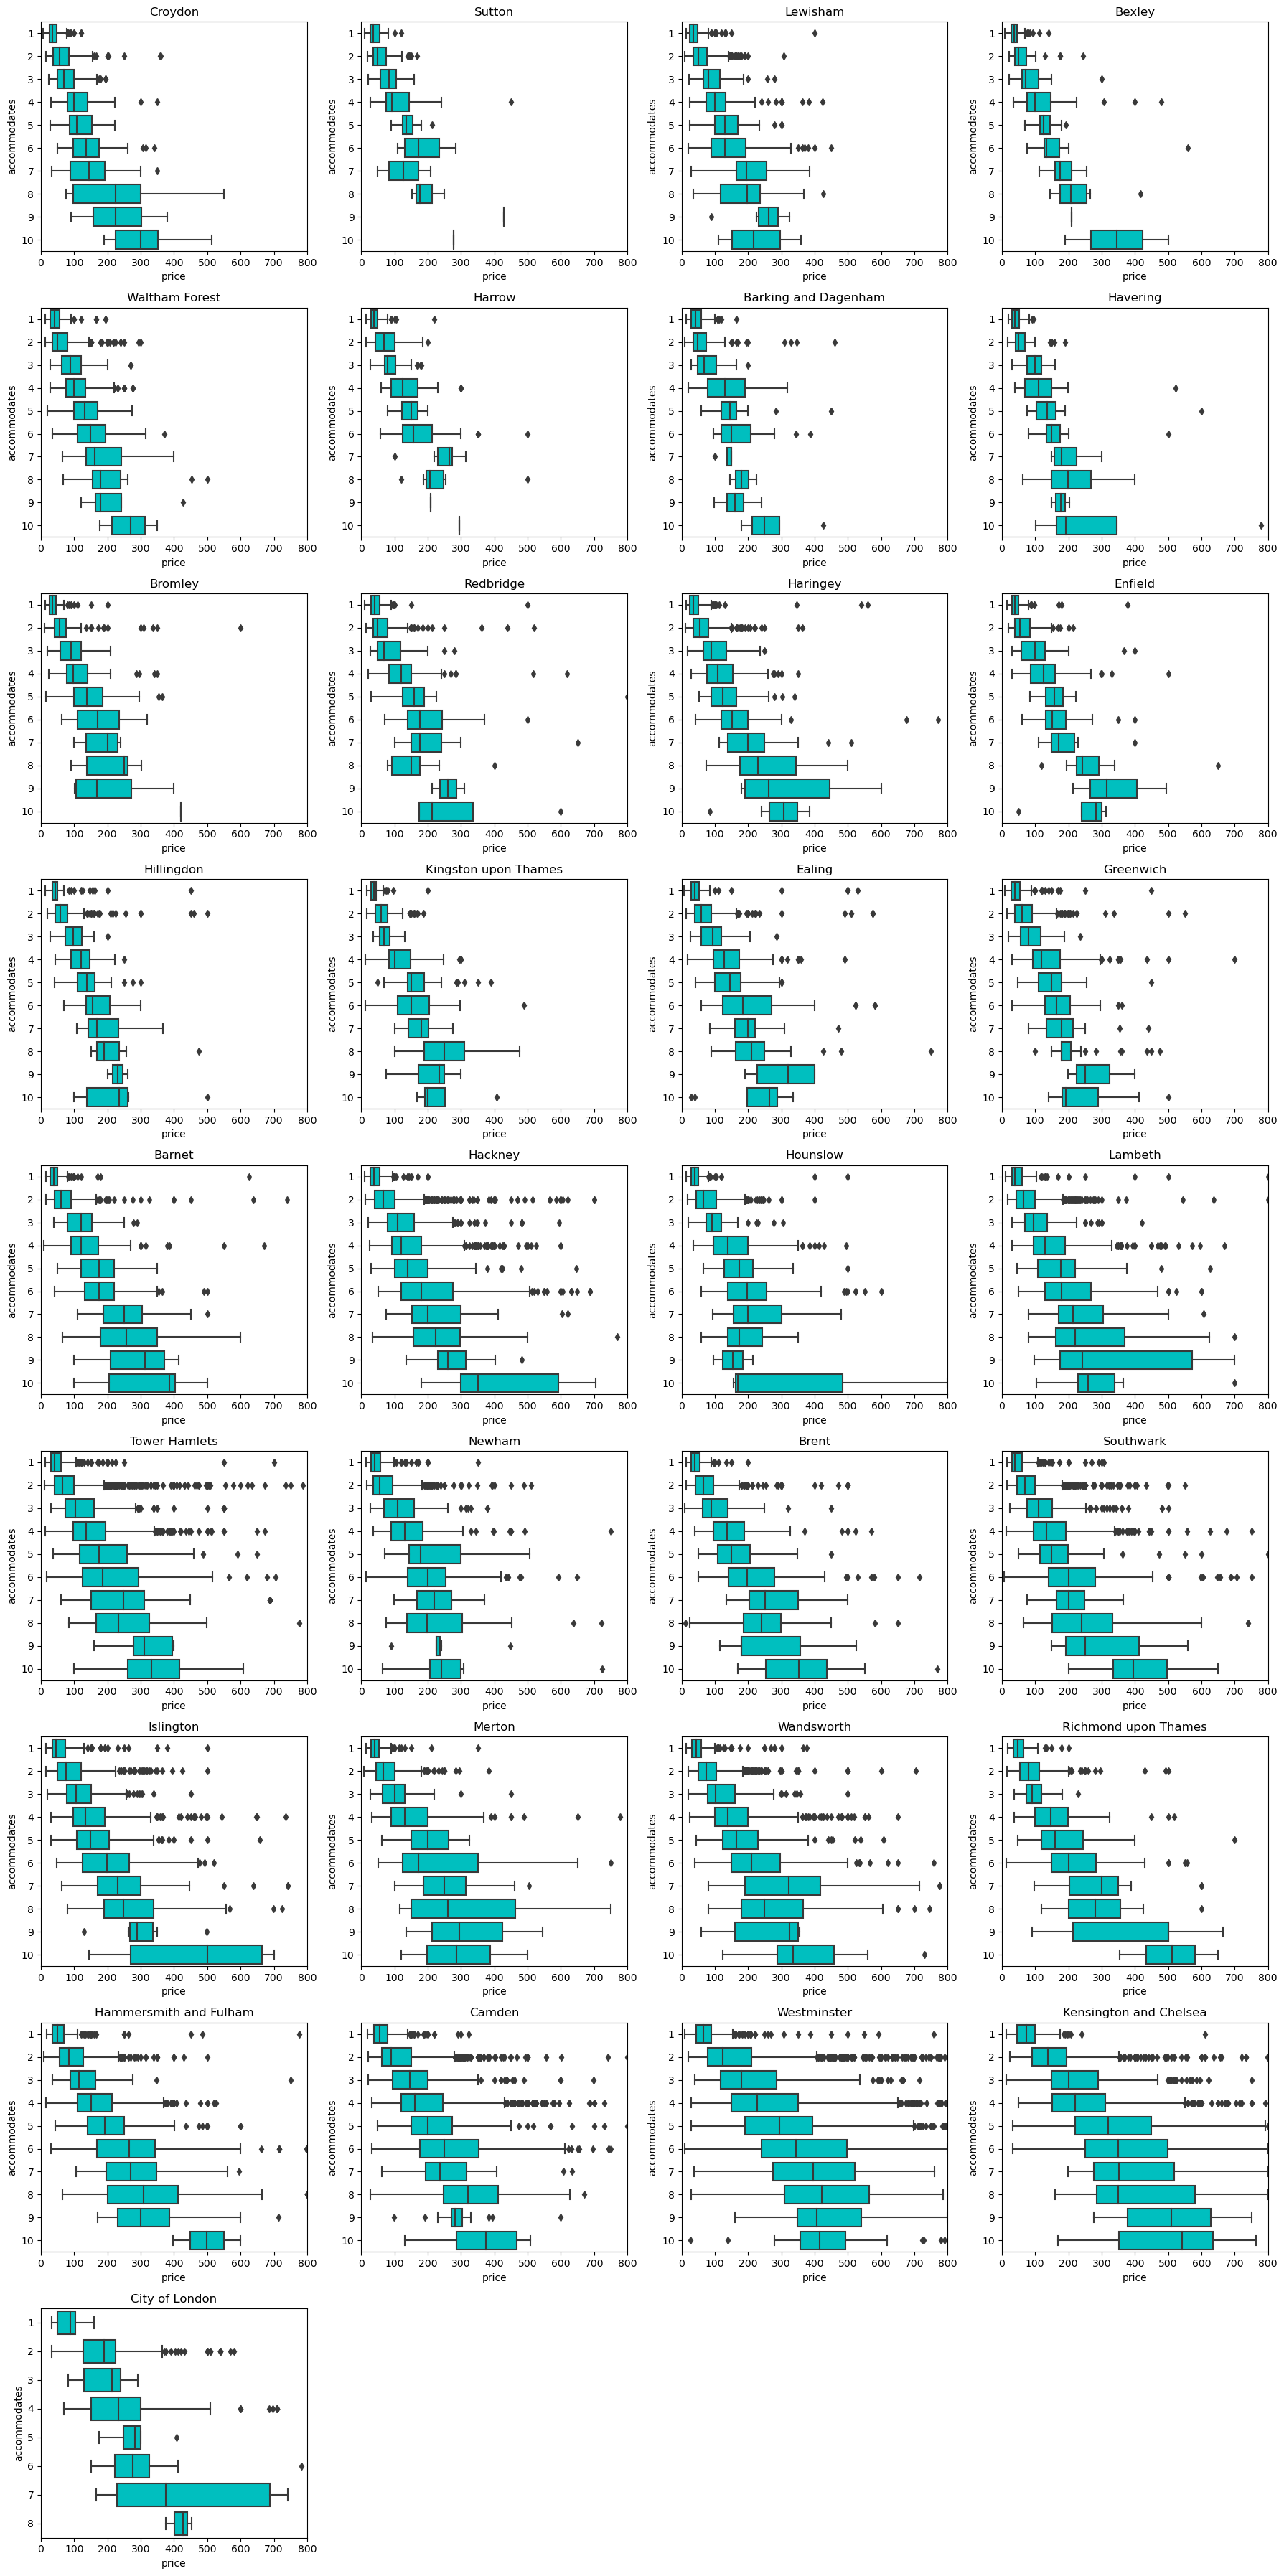

In [109]:
plot_many_boxplots(df_data[(df_data['outlier_check'] == 'No')],
                   'price', 'accommodates', 'neighbourhood_cleansed',
                   set_x_lim=800)

Showing boxplots for each neighbourhood - **with outliers**:


Each visualization corresponds to a different value of neighbourhood_cleansed:




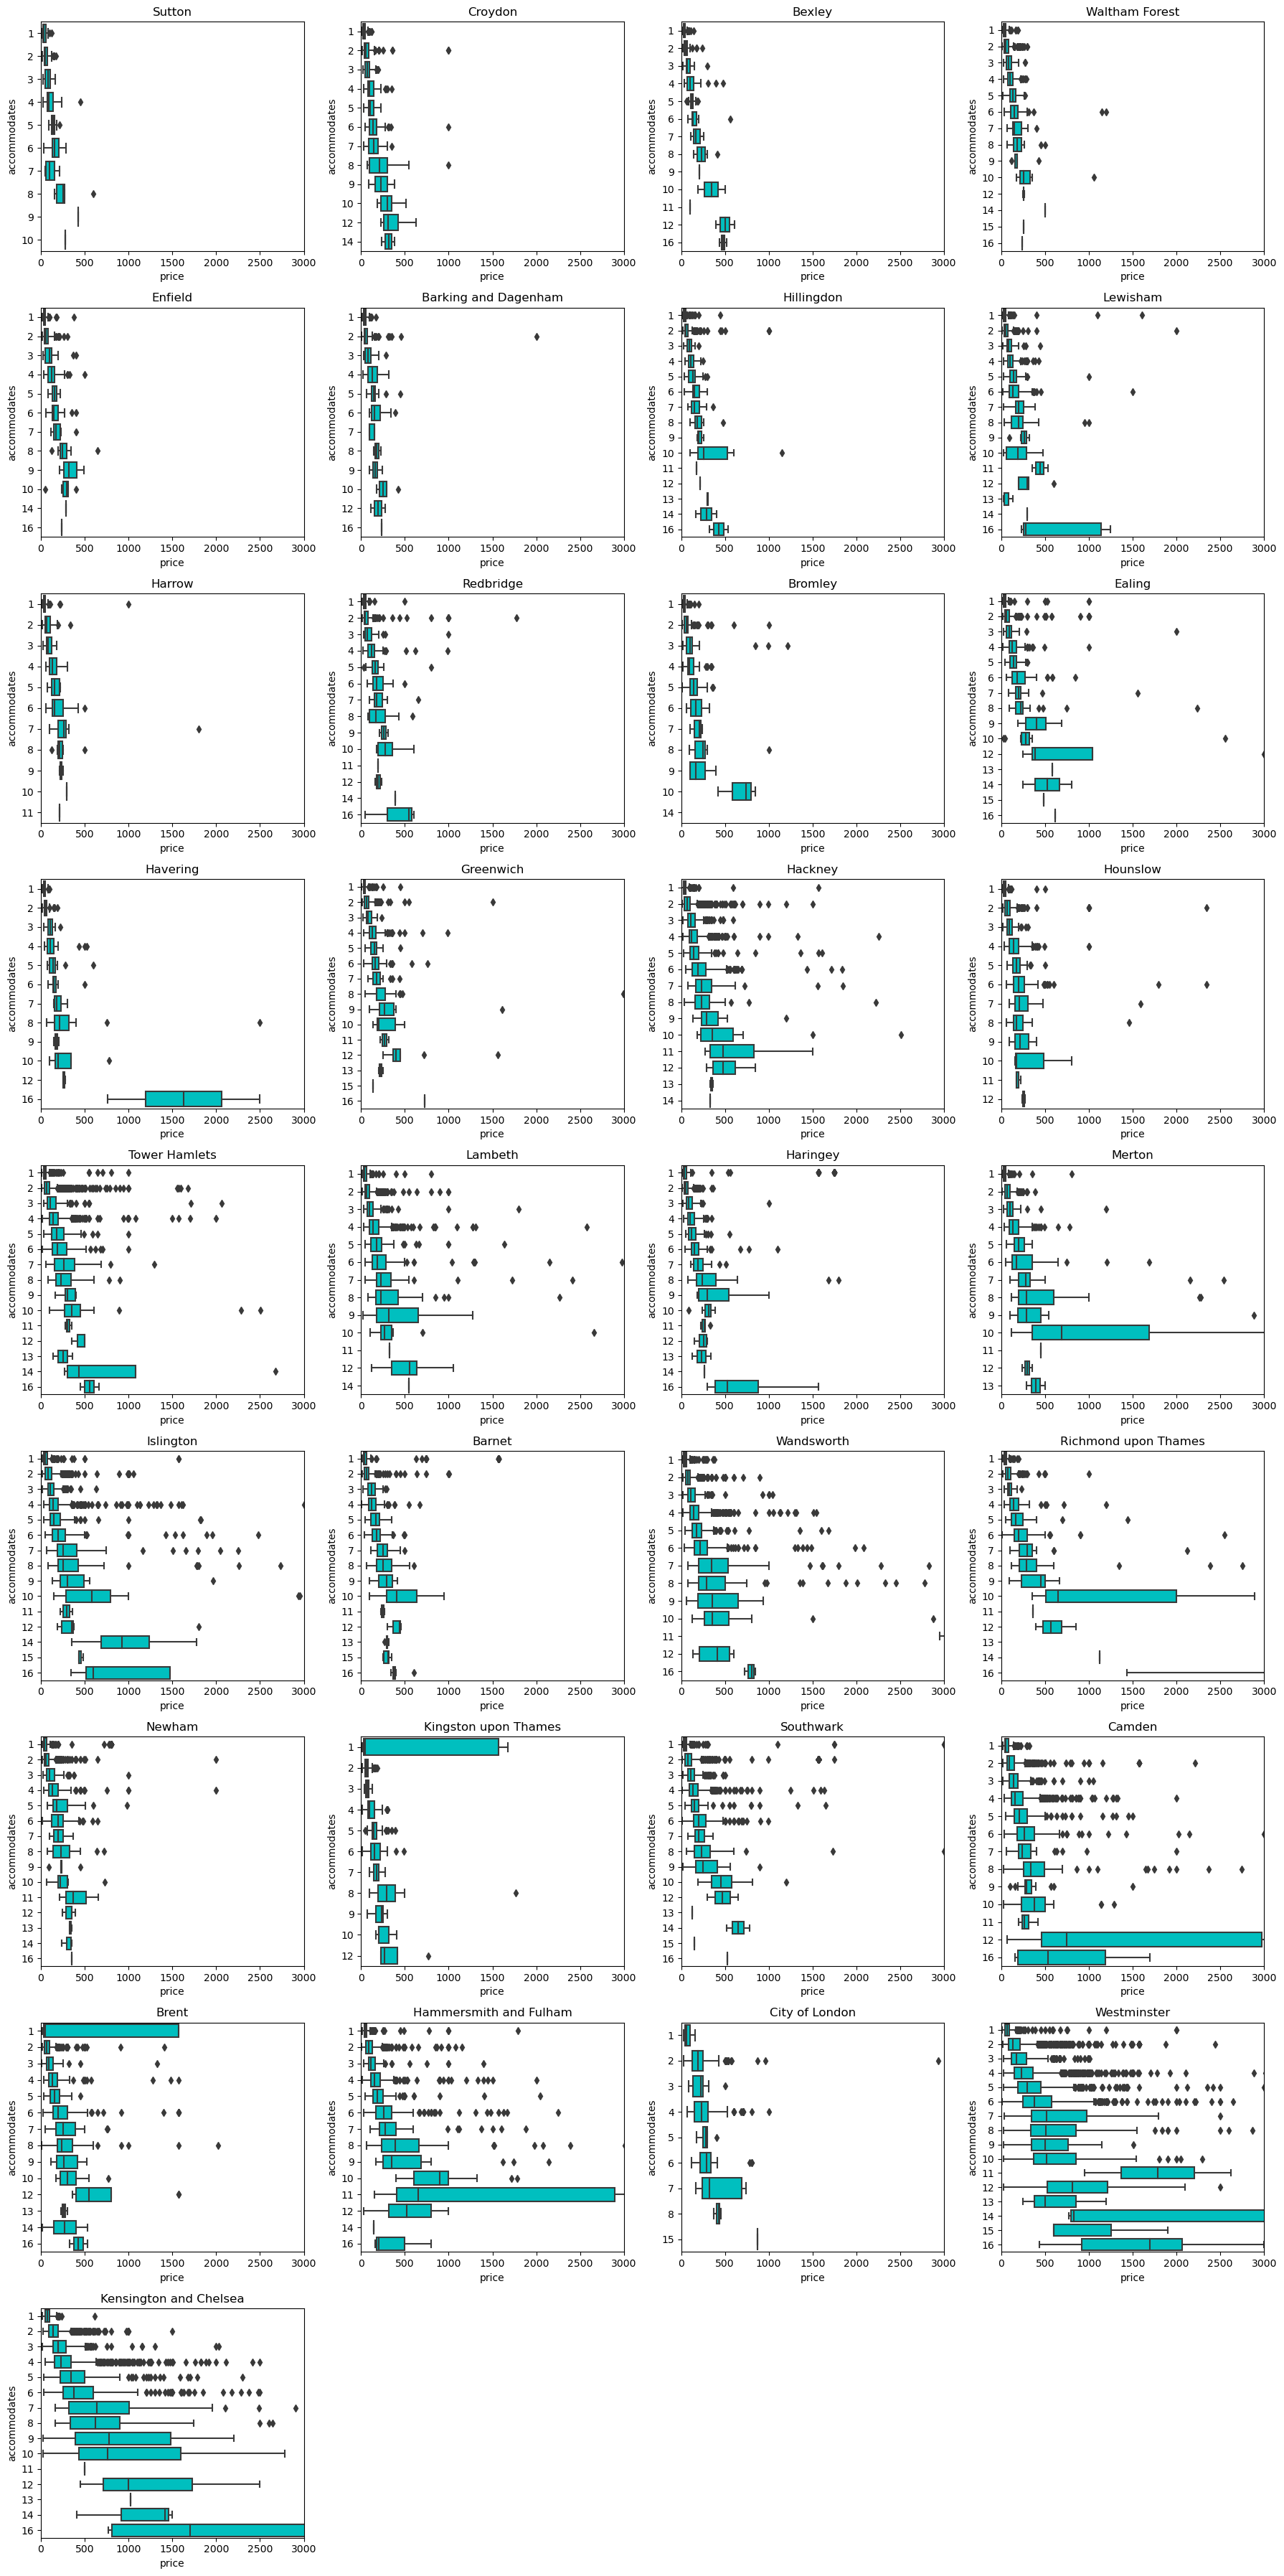

In [110]:
plot_many_boxplots(df_data,
                   'price', 'accommodates', 'neighbourhood_cleansed',
                   set_x_lim=3000)